# (1 of 1) Visualization
---

# Superstore Sales
---

This is the 4-year dataset.

In [1]:
import sys
sys.version

'3.8.8 (default, Apr 13 2021, 19:58:26) \n[GCC 7.3.0]'

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [3]:
# Read the dataset
df = pd.read_csv('./dataset/train.csv')

In [4]:
df

Row ID        Order ID  Order Date   Ship Date       Ship Mode  \
0          1  CA-2017-152156  08/11/2017  11/11/2017    Second Class   
1          2  CA-2017-152156  08/11/2017  11/11/2017    Second Class   
2          3  CA-2017-138688  12/06/2017  16/06/2017    Second Class   
3          4  US-2016-108966  11/10/2016  18/10/2016  Standard Class   
4          5  US-2016-108966  11/10/2016  18/10/2016  Standard Class   
...      ...             ...         ...         ...             ...   
9795    9796  CA-2017-125920  21/05/2017  28/05/2017  Standard Class   
9796    9797  CA-2016-128608  12/01/2016  17/01/2016  Standard Class   
9797    9798  CA-2016-128608  12/01/2016  17/01/2016  Standard Class   
9798    9799  CA-2016-128608  12/01/2016  17/01/2016  Standard Class   
9799    9800  CA-2016-128608  12/01/2016  17/01/2016  Standard Class   

     Customer ID     Customer Name    Segment        Country             City  \
0       CG-12520       Claire Gute   Consumer  United States        Henderson   
1       CG-12520       Claire Gute   Consumer  United States        Henderson   
2       DV-13045   Darrin Van Huff  Corporate  United States      Los Angeles   
3       SO-20335    Sean O'Donnell   Consumer  United States  Fort Lauderdale   
4       SO-20335    Sean O'Donnell   Consumer  United States  Fort Lauderdale   
...          ...               ...        ...            ...              ...   
9795    SH-19975     Sally Hughsby  Corporate  United States          Chicago   
9796    CS-12490  Cindy Schnelling  Corporate  United States           Toledo   
9797    CS-12490  Cindy Schnelling  Corporate  United States           Toledo   
9798    CS-12490  Cindy Schnelling  Corporate  United States           Toledo   
9799    CS-12490  Cindy Schnelling  Corporate  United States           Toledo   

           State  Postal Code   Region       Product ID         Category  \
0       Kentucky      42420.0    South  FUR-BO-10001798        Furniture   
1       Kentucky      42420.0    South  FUR-CH-10000454        Furniture   
2     California      90036.0     West  OFF-LA-10000240  Office Supplies   
3        Florida      33311.0    South  FUR-TA-10000577        Furniture   
4        Florida      33311.0    South  OFF-ST-10000760  Office Supplies   
...          ...          ...      ...              ...              ...   
9795    Illinois      60610.0  Central  OFF-BI-10003429  Office Supplies   
9796        Ohio      43615.0     East  OFF-AR-10001374  Office Supplies   
9797        Ohio      43615.0     East  TEC-PH-10004977       Technology   
9798        Ohio      43615.0     East  TEC-PH-10000912       Technology   
9799        Ohio      43615.0     East  TEC-AC-10000487       Technology   

     Sub-Category                                       Product Name     Sales  
0       Bookcases                  Bush Somerset Collection Bookcase  261.9600  
1          Chairs  Hon Deluxe Fabric Upholstered Stacking Chairs,...  731.9400  
2          Labels  Self-Adhesive Address Labels for Typewriters b...   14.6200  
3          Tables      Bretford CR4500 Series Slim Rectangular Table  957.5775  
4         Storage                     Eldon Fold 'N Roll Cart System   22.3680  
...           ...                                                ...       ...  
9795      Binders  Cardinal HOLDit! Binder Insert Strips,Extra St...    3.7980  
9796          Art           BIC Brite Liner Highlighters, Chisel Tip   10.3680  
9797       Phones                                        GE 30524EE4  235.1880  
9798       Phones           Anker 24W Portable Micro USB Car Charger   26.3760  
9799  Accessories                SanDisk Cruzer 4 GB USB Flash Drive   10.3840  

[9800 rows x 18 columns]

In [5]:
df.nunique()

Row ID           9800
Order ID         4922
Order Date       1230
Ship Date        1326
Ship Mode           4
Customer ID       793
Customer Name     793
Segment             3
Country             1
City              529
State              49
Postal Code       626
Region              4
Product ID       1861
Category            3
Sub-Category       17
Product Name     1849
Sales            5757
dtype: int64

# Data Cleaning
---

In [6]:
# Drop the Row ID column
df.drop('Row ID',axis = 1, inplace = True)

Check if this dataset contains any null values.

In [7]:
print(df.isnull().sum())

Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64


In [8]:
df[df['Postal Code'].isnull()]

Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
2234  CA-2018-104066  05/12/2018  10/12/2018  Standard Class    QJ-19255   
5274  CA-2016-162887  07/11/2016  09/11/2016    Second Class    SV-20785   
8798  US-2017-150140  06/04/2017  10/04/2017  Standard Class    VM-21685   
9146  US-2017-165505  23/01/2017  27/01/2017  Standard Class    CB-12535   
9147  US-2017-165505  23/01/2017  27/01/2017  Standard Class    CB-12535   
9148  US-2017-165505  23/01/2017  27/01/2017  Standard Class    CB-12535   
9386  US-2018-127292  19/01/2018  23/01/2018  Standard Class    RM-19375   
9387  US-2018-127292  19/01/2018  23/01/2018  Standard Class    RM-19375   
9388  US-2018-127292  19/01/2018  23/01/2018  Standard Class    RM-19375   
9389  US-2018-127292  19/01/2018  23/01/2018  Standard Class    RM-19375   
9741  CA-2016-117086  08/11/2016  12/11/2016  Standard Class    QJ-19255   

         Customer Name      Segment        Country        City    State  \
2234      Quincy Jones    Corporate  United States  Burlington  Vermont   
5274  Stewart Visinsky     Consumer  United States  Burlington  Vermont   
8798   Valerie Mitchum  Home Office  United States  Burlington  Vermont   
9146  Claudia Bergmann    Corporate  United States  Burlington  Vermont   
9147  Claudia Bergmann    Corporate  United States  Burlington  Vermont   
9148  Claudia Bergmann    Corporate  United States  Burlington  Vermont   
9386     Raymond Messe     Consumer  United States  Burlington  Vermont   
9387     Raymond Messe     Consumer  United States  Burlington  Vermont   
9388     Raymond Messe     Consumer  United States  Burlington  Vermont   
9389     Raymond Messe     Consumer  United States  Burlington  Vermont   
9741      Quincy Jones    Corporate  United States  Burlington  Vermont   

      Postal Code Region       Product ID         Category Sub-Category  \
2234          NaN   East  TEC-AC-10001013       Technology  Accessories   
5274          NaN   East  FUR-CH-10000595        Furniture       Chairs   
8798          NaN   East  TEC-PH-10002555       Technology       Phones   
9146          NaN   East  TEC-AC-10002926       Technology  Accessories   
9147          NaN   East  OFF-AR-10003477  Office Supplies          Art   
9148          NaN   East  OFF-ST-10001526  Office Supplies      Storage   
9386          NaN   East  OFF-PA-10000157  Office Supplies        Paper   
9387          NaN   East  OFF-PA-10001970  Office Supplies        Paper   
9388          NaN   East  OFF-AP-10000828  Office Supplies   Appliances   
9389          NaN   East  OFF-EN-10001509  Office Supplies    Envelopes   
9741          NaN   East  FUR-BO-10004834        Furniture    Bookcases   

                                           Product Name    Sales  
2234        Logitech ClearChat Comfort/USB Headset H390   205.03  
5274                    Safco Contoured Stacking Chairs   715.20  
8798                Nortel Meridian M5316 Digital phone  1294.75  
9146              Logitech Wireless Marathon Mouse M705    99.98  
9147                                  4009 Highlighters     8.04  
9148              Iceberg Mobile Mega Data/Printer Cart  1564.29  
9386                                          Xerox 191    79.92  
9387                                         Xerox 1881    12.28  
9388                    Avanti 4.4 Cu. Ft. Refrigerator   542.94  
9389                          Poly String Tie Envelopes     2.04  
9741  Riverside Palais Royal Lawyers Bookcase, Royal...  4404.90

Found NaN at the column "Postal Code". So, I will fix it to the postal code for that city.

In [9]:
# Postal code for Burlington city
df['Postal Code'] = df['Postal Code'].fillna(5401)

In [10]:
print(df.isnull().sum())

Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
dtype: int64


Create columns for Year and Month from the "Order Date".

In [11]:
df['Order Date'][0]

'08/11/2017'

In [12]:
df['Order Date'][0].split('/')

['08', '11', '2017']

In [13]:
df['Year-Order'] = df['Order Date'].apply(lambda x: x.split('/')[2])
df['Month-Order'] = df['Order Date'].apply(lambda x: x.split('/')[1])

In [14]:
#df

Create column Day-of-week (Mon, Tue....) from the "Order Date".

In [15]:
# Convert Order Date to pandas datetime format
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%d/%m/%Y')

# Convert Ship Date to pandas datetime format
df['Ship Date'] = pd.to_datetime(df['Ship Date'], format='%d/%m/%Y')   

In [16]:
df['Order Date'][0]

Timestamp('2017-11-08 00:00:00')

In [17]:
df['Day-of-Week'] = df['Order Date'].apply(lambda time: time.dayofweek)

In [18]:
day_of_week = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
df['Day-of-Week'] = df['Day-of-Week'].map(day_of_week)

In [19]:
df

Order ID Order Date  Ship Date       Ship Mode Customer ID  \
0     CA-2017-152156 2017-11-08 2017-11-11    Second Class    CG-12520   
1     CA-2017-152156 2017-11-08 2017-11-11    Second Class    CG-12520   
2     CA-2017-138688 2017-06-12 2017-06-16    Second Class    DV-13045   
3     US-2016-108966 2016-10-11 2016-10-18  Standard Class    SO-20335   
4     US-2016-108966 2016-10-11 2016-10-18  Standard Class    SO-20335   
...              ...        ...        ...             ...         ...   
9795  CA-2017-125920 2017-05-21 2017-05-28  Standard Class    SH-19975   
9796  CA-2016-128608 2016-01-12 2016-01-17  Standard Class    CS-12490   
9797  CA-2016-128608 2016-01-12 2016-01-17  Standard Class    CS-12490   
9798  CA-2016-128608 2016-01-12 2016-01-17  Standard Class    CS-12490   
9799  CA-2016-128608 2016-01-12 2016-01-17  Standard Class    CS-12490   

         Customer Name    Segment        Country             City       State  \
0          Claire Gute   Consumer  United States        Henderson    Kentucky   
1          Claire Gute   Consumer  United States        Henderson    Kentucky   
2      Darrin Van Huff  Corporate  United States      Los Angeles  California   
3       Sean O'Donnell   Consumer  United States  Fort Lauderdale     Florida   
4       Sean O'Donnell   Consumer  United States  Fort Lauderdale     Florida   
...                ...        ...            ...              ...         ...   
9795     Sally Hughsby  Corporate  United States          Chicago    Illinois   
9796  Cindy Schnelling  Corporate  United States           Toledo        Ohio   
9797  Cindy Schnelling  Corporate  United States           Toledo        Ohio   
9798  Cindy Schnelling  Corporate  United States           Toledo        Ohio   
9799  Cindy Schnelling  Corporate  United States           Toledo        Ohio   

      Postal Code   Region       Product ID         Category Sub-Category  \
0         42420.0    South  FUR-BO-10001798        Furniture    Bookcases   
1         42420.0    South  FUR-CH-10000454        Furniture       Chairs   
2         90036.0     West  OFF-LA-10000240  Office Supplies       Labels   
3         33311.0    South  FUR-TA-10000577        Furniture       Tables   
4         33311.0    South  OFF-ST-10000760  Office Supplies      Storage   
...           ...      ...              ...              ...          ...   
9795      60610.0  Central  OFF-BI-10003429  Office Supplies      Binders   
9796      43615.0     East  OFF-AR-10001374  Office Supplies          Art   
9797      43615.0     East  TEC-PH-10004977       Technology       Phones   
9798      43615.0     East  TEC-PH-10000912       Technology       Phones   
9799      43615.0     East  TEC-AC-10000487       Technology  Accessories   

                                           Product Name     Sales Year-Order  \
0                     Bush Somerset Collection Bookcase  261.9600       2017   
1     Hon Deluxe Fabric Upholstered Stacking Chairs,...  731.9400       2017   
2     Self-Adhesive Address Labels for Typewriters b...   14.6200       2017   
3         Bretford CR4500 Series Slim Rectangular Table  957.5775       2016   
4                        Eldon Fold 'N Roll Cart System   22.3680       2016   
...                                                 ...       ...        ...   
9795  Cardinal HOLDit! Binder Insert Strips,Extra St...    3.7980       2017   
9796           BIC Brite Liner Highlighters, Chisel Tip   10.3680       2016   
9797                                        GE 30524EE4  235.1880       2016   
9798           Anker 24W Portable Micro USB Car Charger   26.3760       2016   
9799                SanDisk Cruzer 4 GB USB Flash Drive   10.3840       2016   

     Month-Order Day-of-Week  
0             11         Wed  
1             11         Wed  
2             06         Mon  
3             10         Tue  
4             10         Tue  
...          ...         ...  
9795          05         Sun  
9796          01

In [20]:
# Sorting data by order date
df.sort_values(by=['Order Date'], inplace=True, ascending=True)

In [21]:
# Setting the index to be the date will help us later
df.set_index("Order Date", inplace = True)

In [22]:
df

Order ID  Ship Date       Ship Mode Customer ID  \
Order Date                                                          
2015-01-03  CA-2015-103800 2015-01-07  Standard Class    DP-13000   
2015-01-04  CA-2015-112326 2015-01-08  Standard Class    PO-19195   
2015-01-04  CA-2015-112326 2015-01-08  Standard Class    PO-19195   
2015-01-04  CA-2015-112326 2015-01-08  Standard Class    PO-19195   
2015-01-05  CA-2015-141817 2015-01-12  Standard Class    MB-18085   
...                    ...        ...             ...         ...   
2018-12-30  CA-2018-115427 2019-01-03  Standard Class    EB-13975   
2018-12-30  CA-2018-143259 2019-01-03  Standard Class    PO-18865   
2018-12-30  CA-2018-126221 2019-01-05  Standard Class    CC-12430   
2018-12-30  CA-2018-143259 2019-01-03  Standard Class    PO-18865   
2018-12-30  CA-2018-156720 2019-01-03  Standard Class    JM-15580   

                Customer Name      Segment        Country           City  \
Order Date                                                                 
2015-01-03      Darren Powers     Consumer  United States        Houston   
2015-01-04      Phillina Ober  Home Office  United States     Naperville   
2015-01-04      Phillina Ober  Home Office  United States     Naperville   
2015-01-04      Phillina Ober  Home Office  United States     Naperville   
2015-01-05         Mick Brown     Consumer  United States   Philadelphia   
...                       ...          ...            ...            ...   
2018-12-30         Erica Bern    Corporate  United States      Fairfield   
2018-12-30  Patrick O'Donnell     Consumer  United States  New York City   
2018-12-30        Chuck Clark  Home Office  United States       Columbus   
2018-12-30  Patrick O'Donnell     Consumer  United States  New York City   
2018-12-30      Jill Matthias     Consumer  United States       Loveland   

                   State  Postal Code   Region       Product ID  \
Order Date                                                        
2015-01-03         Texas      77095.0  Central  OFF-PA-10000174   
2015-01-04      Illinois      60540.0  Central  OFF-BI-10004094   
2015-01-04      Illinois      60540.0  Central  OFF-ST-10002743   
2015-01-04      Illinois      60540.0  Central  OFF-LA-10003223   
2015-01-05  Pennsylvania      19143.0     East  OFF-AR-10003478   
...                  ...          ...      ...              ...   
2018-12-30    California      94533.0     West  OFF-BI-10004632   
2018-12-30      New York      10009.0     East  FUR-BO-10003441   
2018-12-30       Indiana      47201.0  Central  OFF-AP-10002457   
2018-12-30      New York      10009.0     East  OFF-BI-10003684   
2018-12-30      Colorado      80538.0     West  OFF-FA-10003472   

                   Category Sub-Category  \
Order Date                                 
2015-01-03  Office Supplies        Paper   
2015-01-04  Office Supplies      Binders   
2015-01-04  Office Supplies      Storage   
2015-01-04  Office Supplies       Labels   
2015-01-05  Office Supplies          Art   
...                     ...          ...   
2018-12-30  Office Supplies      Binders   
2018-12-30        Furniture    Bookcases   
2018-12-30  Office Supplies   Appliances   
2018-12-30  Office Supplies      Binders   
2018-12-30  Office Supplies    Fasteners   

                                                 Product Name    Sales  \
Order Date                                                               
2015-01-03  Message Book, Wirebound, Four 5 1/2" X 4" Form...   16.448   
2015-01-04         GBC Standard Plastic Binding Systems Combs    3.540   
2015-01-04                      SAFCO Boltless Steel Shelving  272.736   
2015-01-04                                          Avery 508   11.784   
2015-01-05  Avery Hi-Liter EverBold Pen Style Fluorescent ...   19.536   
...                                                       ...      ...   
2018-12-30                                 GBC Binding covers   20.720   
2018-12-30  Bush Wes

# Exploratory Data Analysis
---

In [23]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9800 entries, 2015-01-03 to 2018-12-30
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Order ID       9800 non-null   object        
 1   Ship Date      9800 non-null   datetime64[ns]
 2   Ship Mode      9800 non-null   object        
 3   Customer ID    9800 non-null   object        
 4   Customer Name  9800 non-null   object        
 5   Segment        9800 non-null   object        
 6   Country        9800 non-null   object        
 7   City           9800 non-null   object        
 8   State          9800 non-null   object        
 9   Postal Code    9800 non-null   float64       
 10  Region         9800 non-null   object        
 11  Product ID     9800 non-null   object        
 12  Category       9800 non-null   object        
 13  Sub-Category   9800 non-null   object        
 14  Product Name   9800 non-null   object        
 15  Sal

Postal Code         Sales
count   9800.000000   9800.000000
mean   55217.343265    230.769059
std    32066.750532    626.651875
min     1040.000000      0.444000
25%    23223.000000     17.248000
50%    57551.000000     54.490000
75%    90008.000000    210.605000
max    99301.000000  22638.480000

Text(0.5, 0.98, 'Sales Distribution')

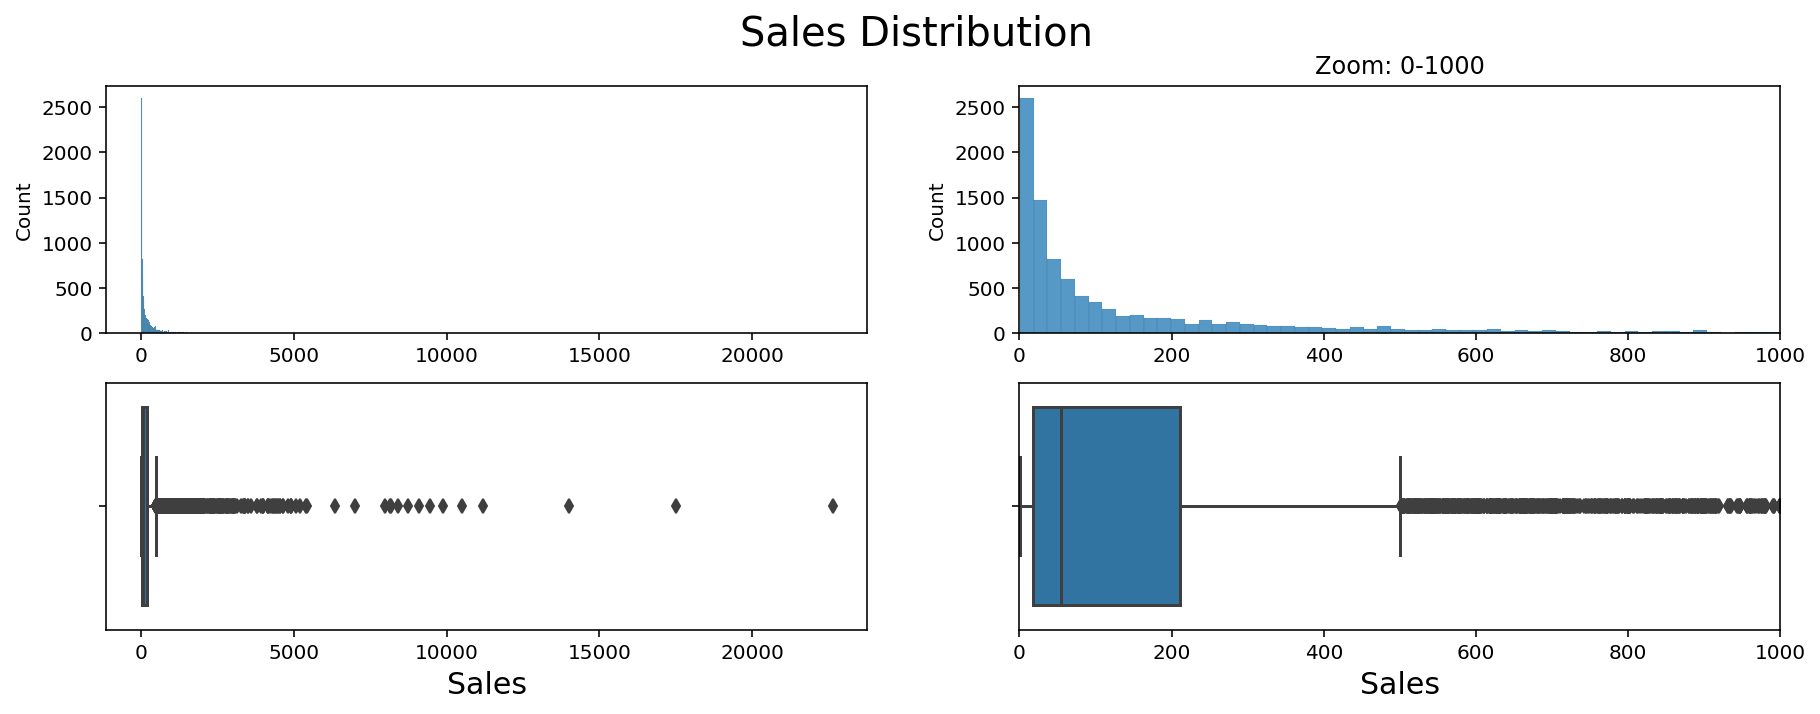

In [24]:
import plotly.express as px

fig = plt.figure(figsize = (15,5))

plt.subplot(221)
sns.histplot(df['Sales'])
plt.xlabel('')

plt.subplot(223)
sns.boxplot(x=df['Sales'])
plt.xlabel('Sales', fontsize=15)

plt.subplot(222)
sns.histplot(df['Sales'])
plt.xlabel('')
plt.xlim(0,1000)
plt.title('Zoom: 0-1000')

plt.subplot(224)
sns.boxplot(x=df['Sales'])
plt.xlabel('Sales', fontsize=15)
plt.xlim(0,1000)

fig.suptitle('Sales Distribution', fontsize=20)

Found that the majority of the orders were low prices, and the graph displayed a bell-shaped distribution with a clear positive skew.

From the statistics, found that:  
Mean = 230.77 USD, Max = 22638.48 USD, Min = 0.44 USD, STD = 626 USD.  
S.D. is very high due to the presence of outliers from the very high prices.

In [25]:
df['Sales'].mode()

0    12.96
dtype: float64

We cannot use this dataset's average to describe the behavior of most customers since the outliers have a strong influence.  

So, I consider from mode = 13 USD and conclude that most customers would  purchase approximately 13 USD.

### Most Valuable Customers

In [26]:
# Sort as per sales
Top_customers = df.groupby(['Customer Name']).sum().sort_values('Sales', ascending=False)
Top_customers = Top_customers.head(20)

# Round off the Sales Value (2 decimals)
Top_customers = Top_customers[['Sales']].round(2)

# Reset the index to add the index names into dataframe
Top_customers.reset_index(inplace=True)

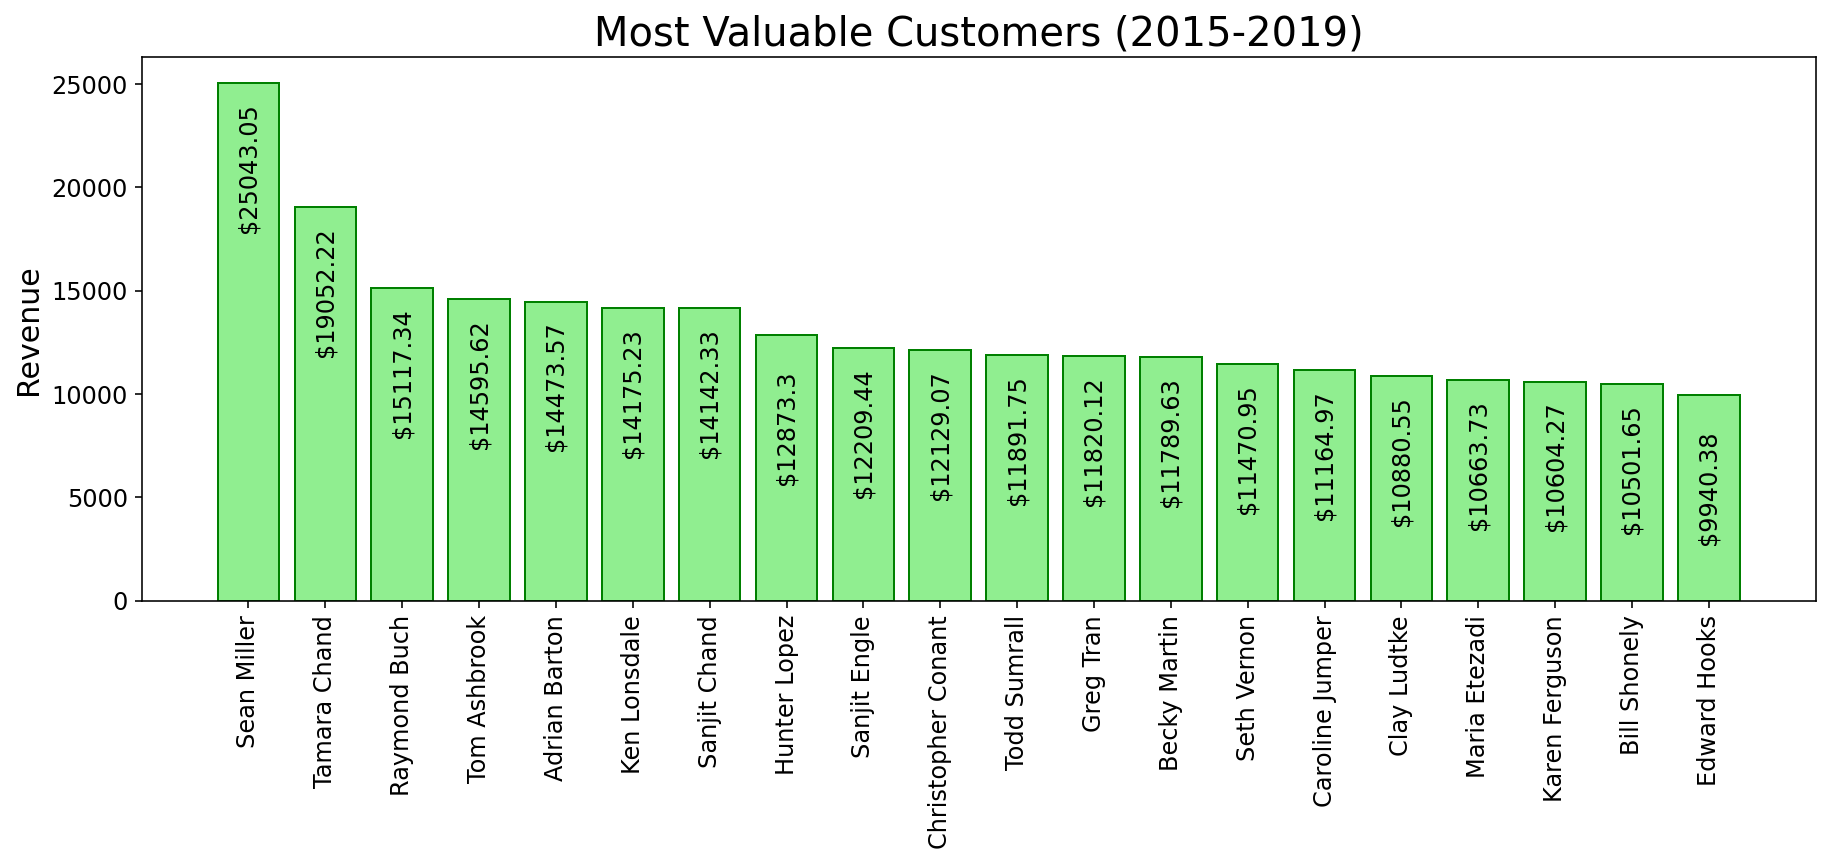

In [27]:
plt.figure(figsize = (15,5))
plt.title('Most Valuable Customers (2015-2019)', fontsize=20)
plt.bar(Top_customers['Customer Name'], Top_customers['Sales'], color='#90ee90',edgecolor='g', lw=1)

plt.ylabel('Revenue', fontsize=15)
plt.xticks(fontsize=12, rotation=90)
plt.yticks(fontsize=12)

for k,v in Top_customers['Sales'].items(): #To show the exact revenue generated on the figure
    plt.text(k,v-7000,'$'+ str(v), fontsize=12,rotation=90, color='k', horizontalalignment='center');

Found that the orders that generate the most revenue are those made by customers who order in 6-digit USD.

### The States that generated the Highest Revenue

In [28]:
# Sort as per sales
Top_states = df.groupby(['State']).sum().sort_values('Sales', ascending=False)
Top_states = Top_states.head(20)

# Round off the Sales Value (2 decimals)
Top_states = Top_states[['Sales']].round(2)

# Reset the index to add the index names into dataframe
Top_states.reset_index(inplace=True)

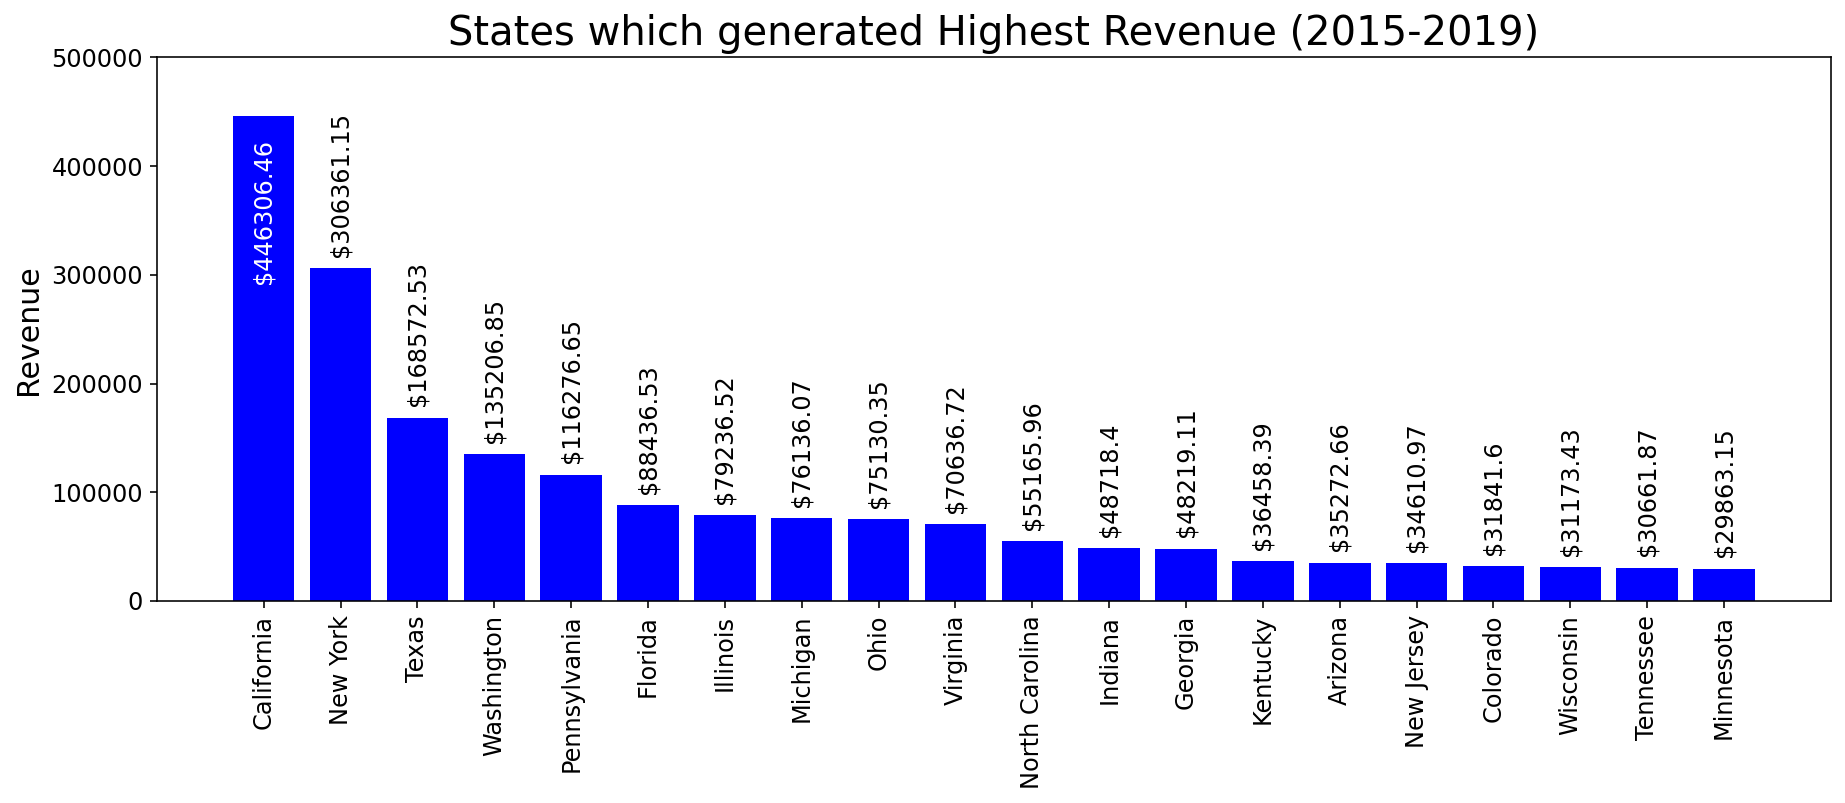

In [29]:
plt.figure(figsize = (15,5))
plt.title('States which generated Highest Revenue (2015-2019)', fontsize=20)
plt.bar(Top_states['State'], Top_states['Sales'], color='b')

plt.ylabel('Revenue',fontsize=15)
plt.ylim(0,500000)
plt.xticks(fontsize=12, rotation=90)
plt.yticks(fontsize=12)

for k,v in Top_states['Sales'].items(): #To show the exact revenue generated on the figure
    if v>400000:
        plt.text(k,v-150000,'$'+ str(v), fontsize=12,rotation=90,color='w', horizontalalignment='center');
    else:
        plt.text(k,v+15000,'$'+ str(v), fontsize=12,rotation=90,color='k', horizontalalignment='center');

Found that the most of the orders come from California, New York, Texas.  

In [30]:
state = ['Alabama', 'Arizona' ,'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware', 'Florida', 
         'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
         'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana','Nebraska', 'Nevada', 'New Hampshire',
         'New Jersey', 'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
         'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
         'West Virginia', 'Wisconsin','Wyoming']
state_code = ['AL','AZ','AR','CA','CO','CT','DE','FL','GA','HI','ID','IL','IN','IA','KS','KY','LA','ME','MD','MA',
              'MI','MN','MS','MO','MT','NE','NV','NH','NJ','NM','NY','NC','ND','OH','OK','OR','PA','RI','SC','SD','TN',
              'TX','UT','VT','VA','WA','WV','WI','WY']

In [31]:
state_df = pd.DataFrame(state, state_code)
state_df.reset_index(level=0, inplace=True)
state_df.columns = ['State Code','State']

In [32]:
#state_df.sample(5)

In [33]:
sales = df.groupby(['State']).sum().sort_values('Sales', ascending=False)
sales.reset_index(level=0, inplace=True)
sales.drop('Postal Code', axis = 1, inplace = True)

sales= sales.sort_values('State', ascending=True)
sales.reset_index(inplace = True)

sales.drop('index',axis = 1,inplace = True)
sales.insert(0, 'State Code', state_df['State Code'])

In [34]:
#sales.sample(5)

In [35]:
import plotly.graph_objects as go

fig = go.Figure(data = go.Choropleth(
    locations = sales['State Code'], # Spatial coordinates
    text = sales['State'],
    z = sales['Sales'].astype(float), # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = 'Blues',
    colorbar_title = "Sales",
))

fig.update_layout(
    title_text = 'Interactive Sales Distribution Map (2015-2019)',
    geo_scope='usa', # limite map scope to the USA
)

![](./img/img1.png) 

### Revenue by each Segment

In [36]:
# Sort as per sales
Revenue_seg = df.groupby(['Segment']).sum().sort_values('Sales', ascending=False)

# Round off the Sales Value (2 decimals)
Revenue_seg = Revenue_seg[['Sales']].round(2)

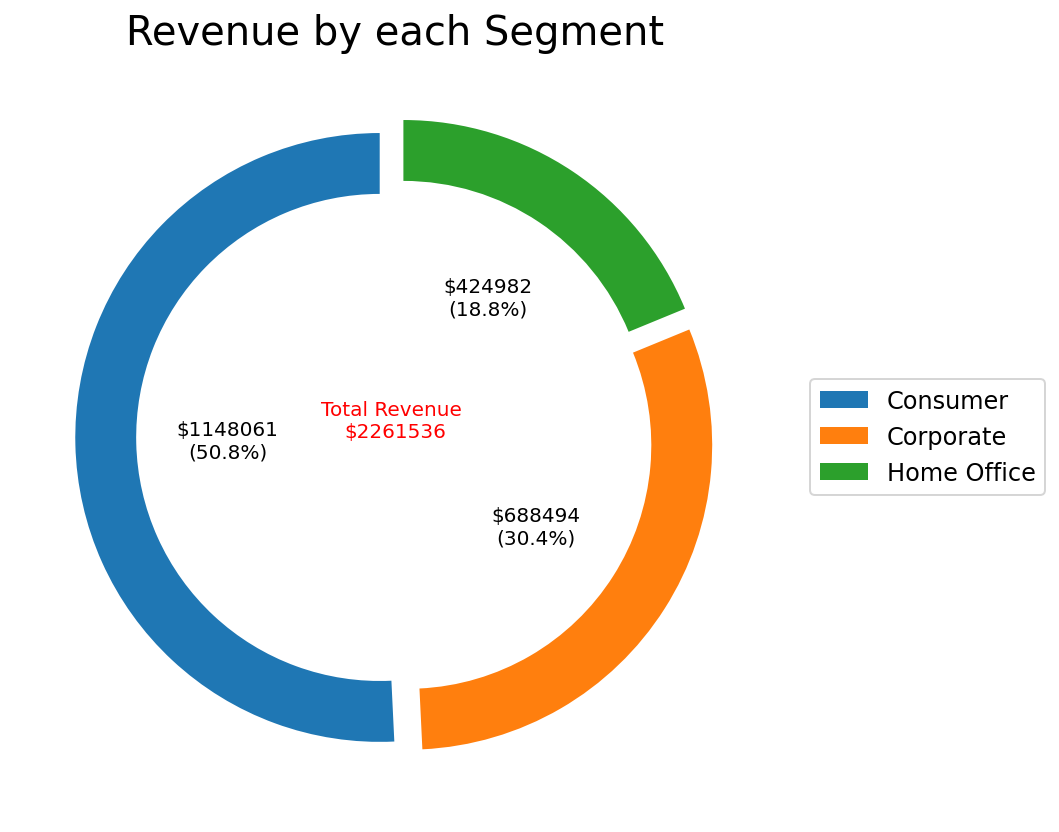

In [37]:
fig, ax = plt.subplots(figsize=(7,7), subplot_kw=dict(aspect="equal"))

# To make the label (revenue and percentage) inside the wedge.
def func(pct, sales):
    val = (pct/100)*sum(sales)
    return "${:.0f}\n({:.1f}%)".format(val, pct)

# Pie chart
explode=np.ones(Revenue_seg.shape[0])*.05
fig = plt.pie(Revenue_seg['Sales'], startangle=90, explode=explode,
              wedgeprops=dict(width=0.2),
              autopct=lambda pct: func(pct, Revenue_seg['Sales']),
              pctdistance=0.5,
              textprops=dict(color='k', size=10))

plt.legend(Revenue_seg.index, loc='center',
           bbox_to_anchor=(1.2,0.5),
           fontsize=12)
plt.title('Revenue by each Segment',fontsize=20)

# To find the total revenue generated as per segment
total_revenue_segement = Revenue_seg['Sales'].sum()
total_revenue_segement = str(int(total_revenue_segement))
total_revenue_segement= '$' + total_revenue_segement

# Annotate Total Revenue
label = ax.annotate('Total Revenue \n'+str(total_revenue_segement),
                     color = 'red', xy=(0, 0), fontsize=10, ha='center')

The consumer segment contributes the highest revenue amount of 1148060 USD, which is equivalent to 50.8% of the total revenue.

Text(0.5, 1.0, 'Number of Orders placed by each Segment')

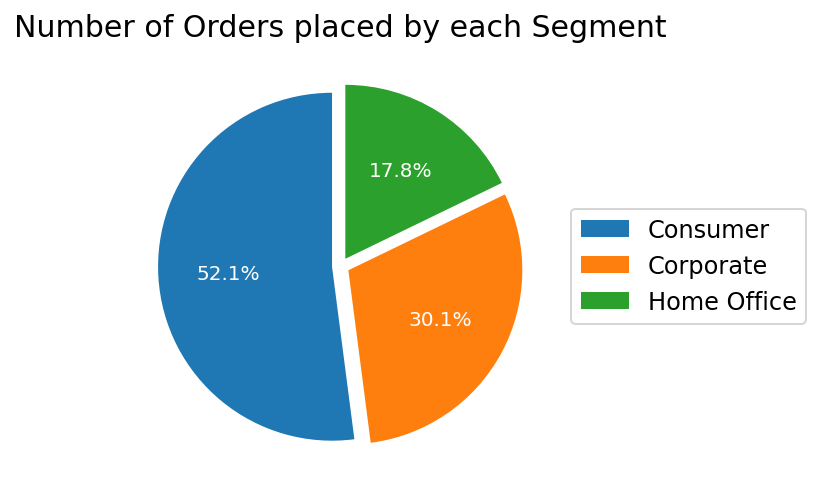

In [38]:
plt.pie(df['Segment'].value_counts(),
        autopct='%1.1f%%', startangle=90,
        explode=np.ones(Revenue_seg.shape[0])*.05,
        textprops=dict(color='w', size=10))

plt.legend(df['Segment'].value_counts().index, loc='center',
           bbox_to_anchor=(1.3,0.5),
           fontsize=12)

plt.title('Number of Orders placed by each Segment',fontsize=15)

Found that most of the orders come from the consumer segment.

The "Number of Orders placed by each Segment" and "Revenue by each Segment" charts have a very small difference.

### Top 10 Highest Revenue Products

In [39]:
# Sort as per sales
Top_prod = df.groupby(['Product Name']).sum().sort_values('Sales', ascending=False)
Top_prod = Top_prod.head(10)

# Round off the Sales Value (2 decimals)
Top_prod = Top_prod[['Sales']].round(2)

# Reset the index to add the index names into dataframe
Top_prod.reset_index(inplace=True)

Text(0.5, 1.05, 'Top 10 Highest Revenue Products')

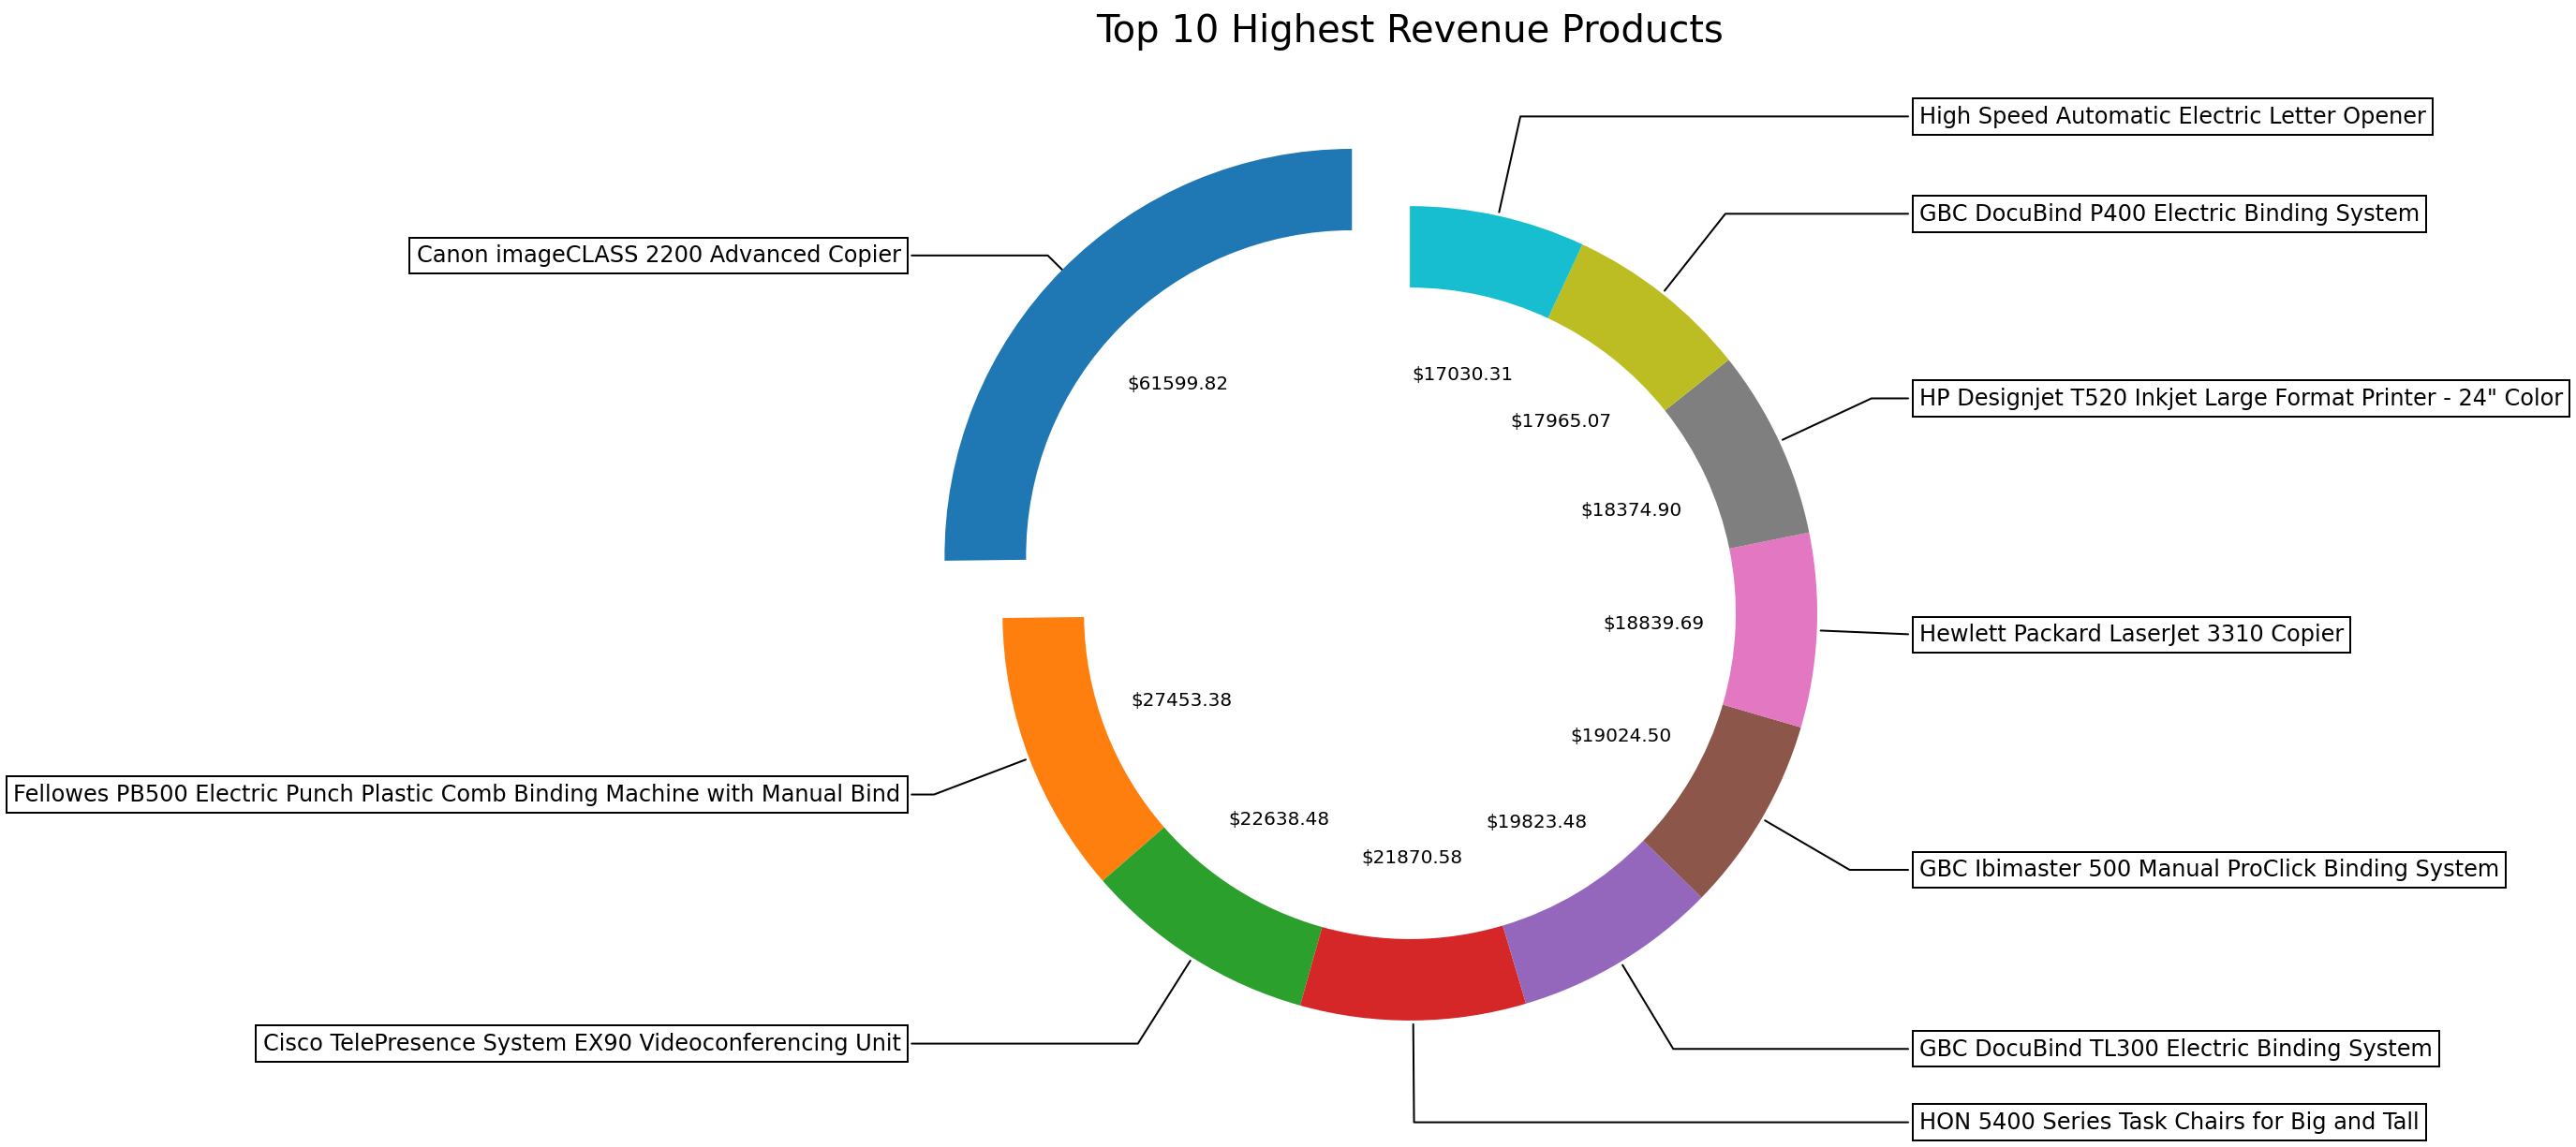

In [40]:
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(aspect="equal"))

# To make the label (revenue) inside the wedge.
def func(pct, sales):
    val = (pct/100)*sum(sales)
    return "${:.2f}".format(val)

# Pie chart
data = Top_prod['Sales']
explode = np.append([0.2], np.zeros(data.shape[0]-1))

wedges, texts, autotexts = ax.pie(data, wedgeprops=dict(width=0.2), 
                       autopct=lambda pct: func(pct, data),
                       explode=explode, startangle=90)

# Annotation
annotate = Top_prod['Product Name']
bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=1)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(annotate[i], xy=(x, y), size=12,
                xytext=(1.25*np.sign(x), 1.25*y),
                horizontalalignment=horizontalalignment, **kw)

plt.title('Top 10 Highest Revenue Products', fontsize=20, y=1.05)

Found that Canon imageCLASS 2200 Advanced Copier generates revenue of 61600 USD.

In [ ]:
# Sort as per sales
Top_prod2 = df.groupby(['Product Name']).sum().sort_values('Sales', ascending=False)
Top_prod2 = Top_prod2.head(30)

# Round off the Sales Value (2 decimals)
Top_prod2 = Top_prod2[['Sales']].round(2)

# Reset the index to add the index names into dataframe
Top_prod2.reset_index(inplace=True)

Text(0.5, 1.0, 'Top 30 Highest Revenue Products')

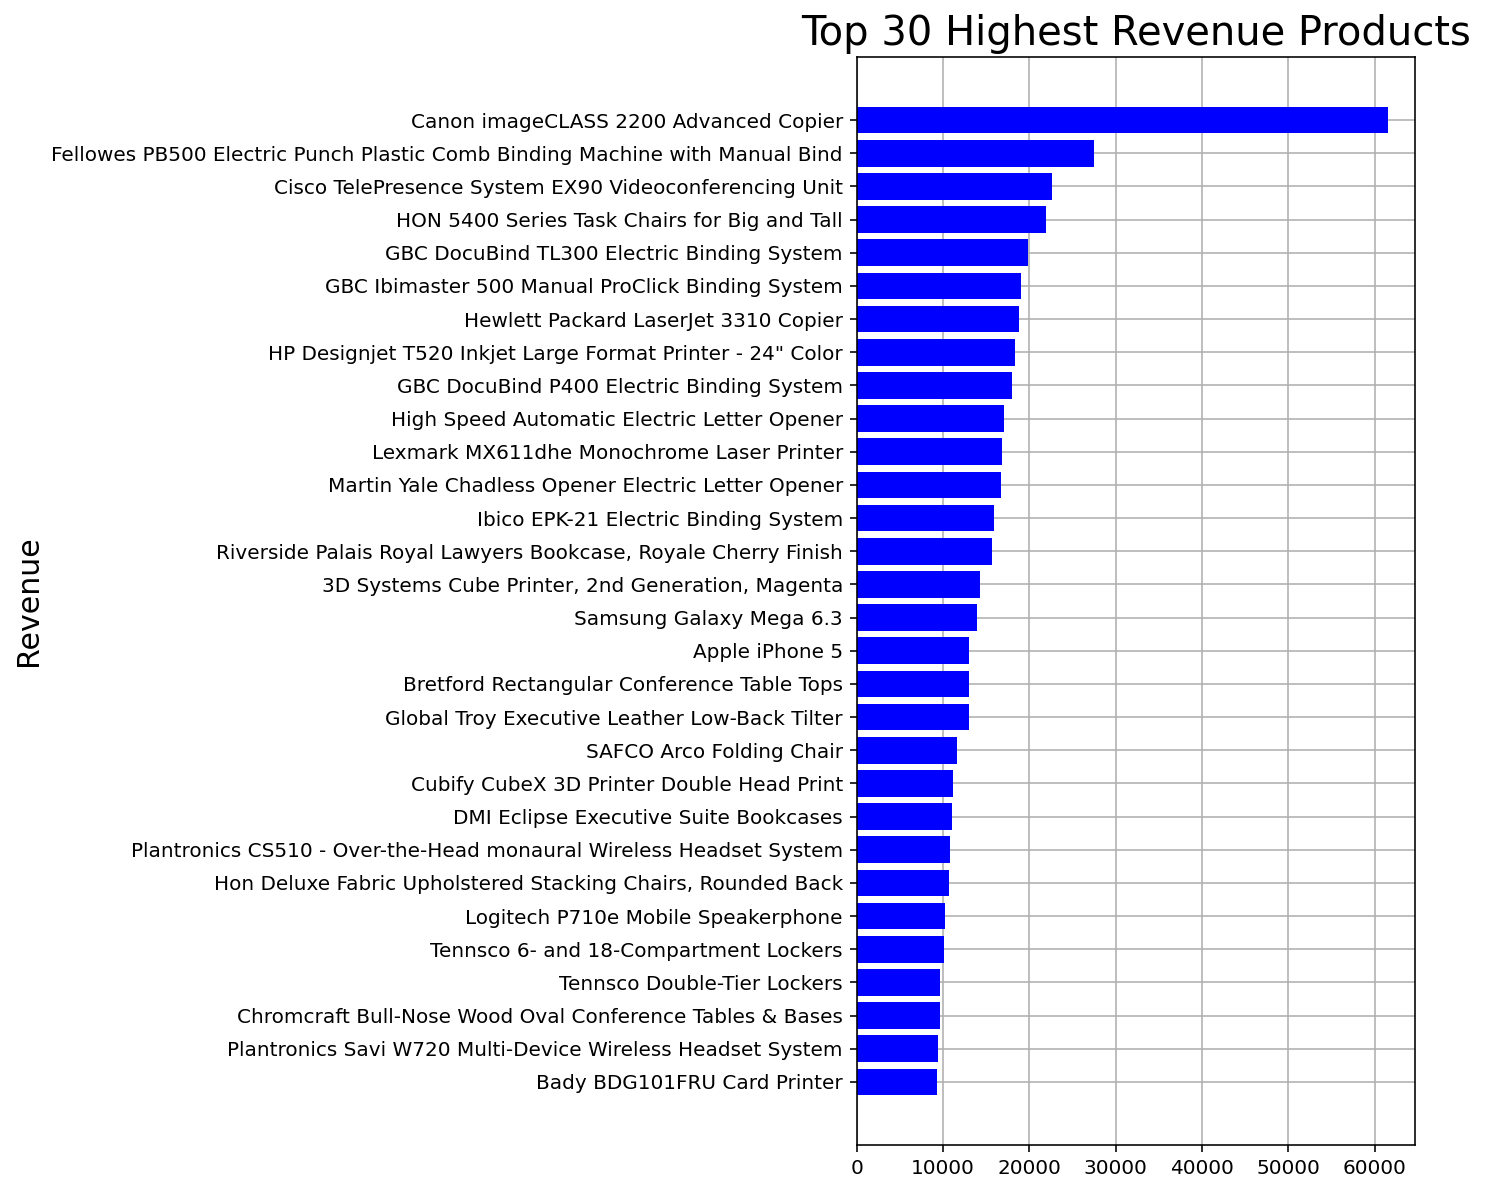

In [42]:
fig, ax = plt.subplots(figsize = (5,10))

ax.barh(Top_prod2['Product Name'], Top_prod2['Sales'], color='b')
plt.gca().invert_yaxis()

ax.set_axisbelow(True)
ax.grid(linestyle='-')
plt.ylabel('Revenue',fontsize=15)
plt.title('Top 30 Highest Revenue Products', fontsize=20)

Found that no goods will generate revenue up to half of Canon imageCLASS 2200 Advanced Copier.

### Revenue generated by each Sub-Category

In [43]:
# Sort as per sales
SubCat = df.groupby(['Category','Sub-Category']).sum().sort_values(['Category','Sales'], ascending=False)

# Round off the Sales Value (2 decimals)
SubCat = SubCat[['Sales']].round(2)

# Reset the index to add the index names into dataframe
SubCat.reset_index(inplace=True)

The last 5 Sub-Categories, each of them has a very low segment.  

I will group them into the "Others" group to get rid of the small wedges that will cause intersecting text when visualizing.

In [44]:
# Combining latter Sub-Categories in Office Supplies into Others
# will help us for visualization in the very next pie chart
SubCat_new = SubCat[:8].copy()
SubCat_new.loc[8] = SubCat[8:13].sum(numeric_only=True)

SubCat_new = pd.concat([SubCat_new,SubCat[13:]], ignore_index = True)
SubCat_new.at[8,'Category'] = 'Office Supplies'
SubCat_new.at[8,'Sub-Category'] = '(Others)'

In [45]:
SubCat2 = SubCat.groupby(['Category']).sum().sort_values(['Category'], ascending=False)
SubCat2.reset_index(inplace=True)

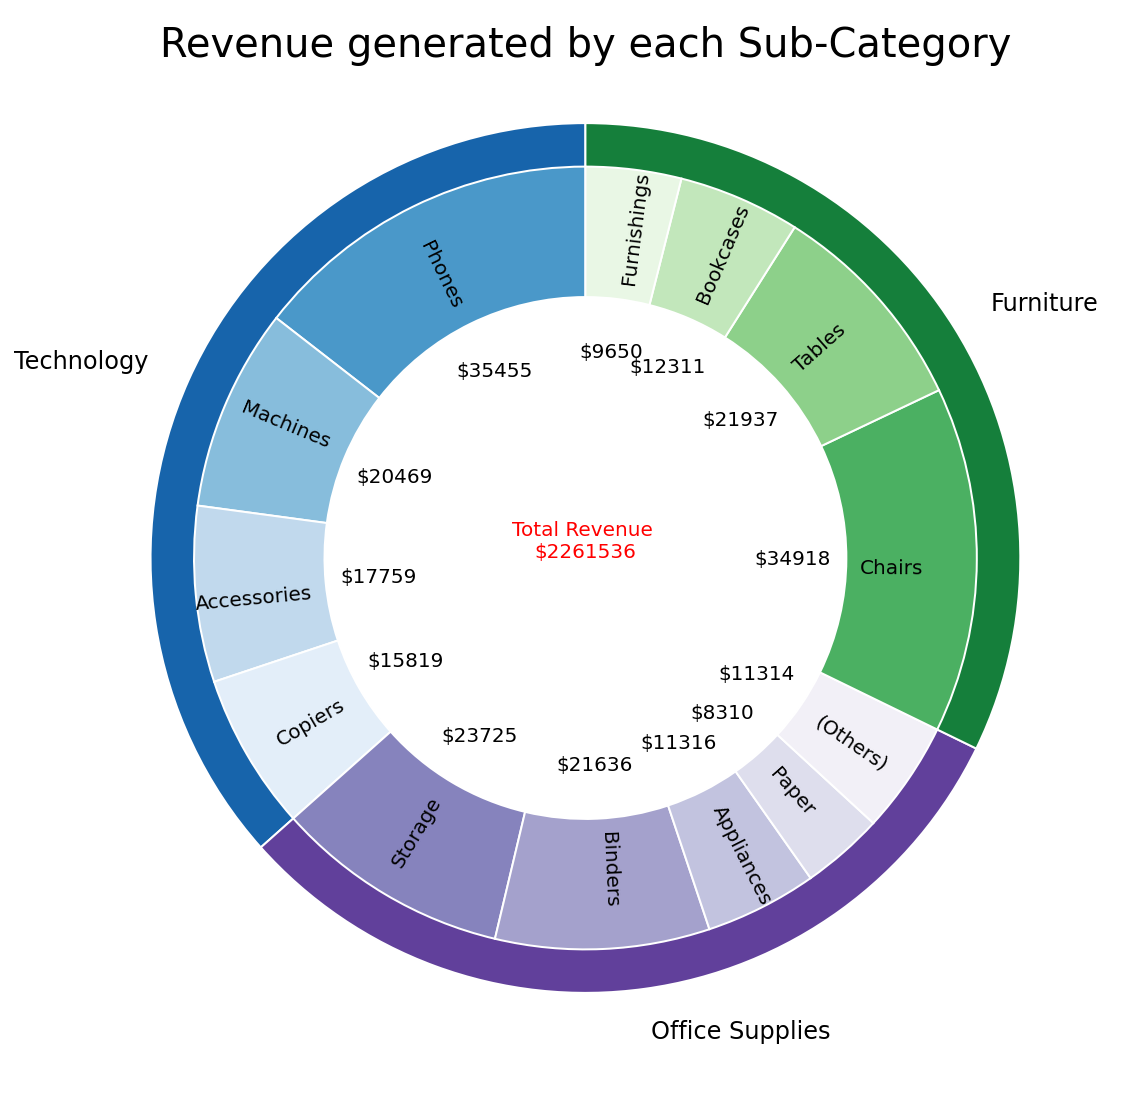

In [46]:
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(aspect="equal"))

# To make the label (revenue) inside the wedge.
def func(pct, sales):
    val = (pct/100)*sum(sales)
    return "${:.0f}".format(val)

# Pie chart
cmap1 = plt.cm.Blues
cmap2 = plt.cm.Purples
cmap3 = plt.cm.Greens

outer_colors = [cmap1(.8), cmap2(.8), cmap3(.8)]
inner_colors = [*cmap1(np.linspace(.6, .1, 4)),
                *cmap2(np.linspace(.6, .1, 5)),
                *cmap3(np.linspace(.6, .1, 4))]

outer_pie = ax.pie(SubCat2['Sales'], radius = 1, startangle=90,
             colors = outer_colors,
             textprops=dict(color='k', size=12),
             labels = SubCat2['Category'], wedgeprops = dict(edgecolor = 'w', width = 0.2))

inner_pie = ax.pie(SubCat_new['Sales'], radius = 0.9, startangle=90,
              colors = inner_colors,
              labels = SubCat_new['Sub-Category'],
              autopct = lambda pct: func(pct, data),
              labeldistance = 0.7, wedgeprops = dict(edgecolor = 'w', width = 0.3),
              textprops=dict(color='k', size=10),
              pctdistance = 0.53, rotatelabels = True)

plt.title('Revenue generated by each Sub-Category', fontsize=20, y=0.95)

# To find the total revenue generated as per segment
total_revenue_segement = SubCat_new['Sales'].sum()
total_revenue_segement = str(int(total_revenue_segement))
total_revenue_segement= '$' + total_revenue_segement

# Annotate Total Revenue
label = ax.annotate('Total Revenue \n'+str(total_revenue_segement),
                     color = 'red', xy=(0, 0), fontsize=10, ha='center')

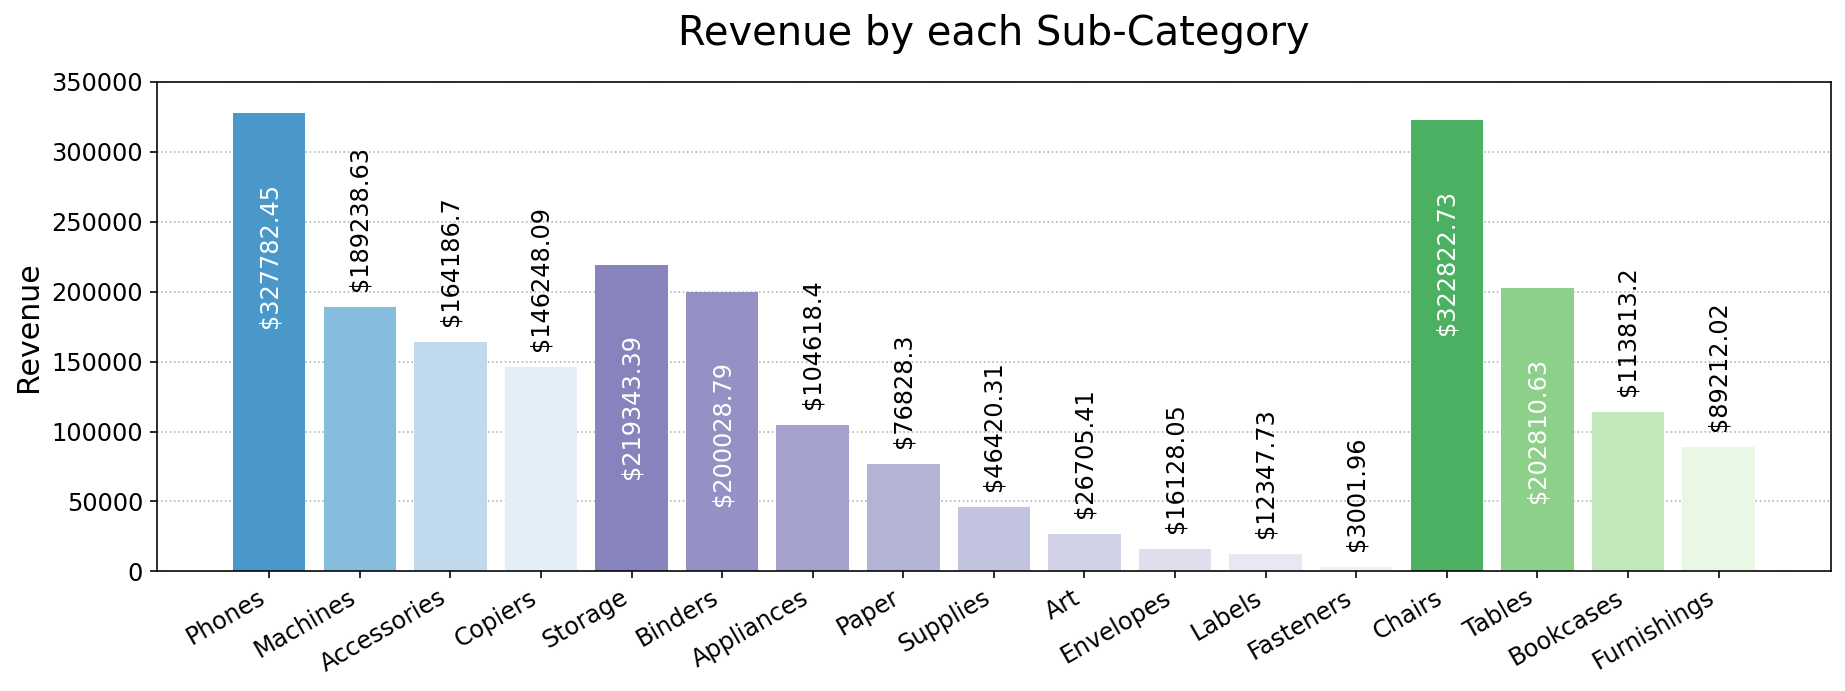

In [47]:
cmap1 = plt.cm.Blues
cmap2 = plt.cm.Purples
cmap3 = plt.cm.Greens
colors = [*cmap1(np.linspace(.6, .1, 4)),
                *cmap2(np.linspace(.6, .1, 9)),
                *cmap3(np.linspace(.6, .1, 4))]

fig, ax = plt.subplots(figsize = (15,5))
ax.set_axisbelow(True)
ax.grid(linestyle=':', axis='y')
plt.title('Revenue by each Sub-Category', fontsize=20, y=1.05)
plt.bar(SubCat['Sub-Category'], SubCat['Sales'],
        color=colors)

plt.ylabel('Revenue',fontsize=15)
plt.ylim(0,350000)
plt.xticks(fontsize=12, rotation=90)
plt.yticks(fontsize=12)
fig.autofmt_xdate()

for k,v in SubCat['Sales'].items(): #To show the exact revenue generated on the figure
    if v>200000:
        plt.text(k,v-150000,'$'+ str(v), fontsize=12,rotation=90,color='w', horizontalalignment='center');
    else:
        plt.text(k,v+15000,'$'+ str(v), fontsize=12,rotation=90,color='k', horizontalalignment='center');

There are 3 Categories: Technology, Office Supplies, and Furniture; separated into sub-categories.


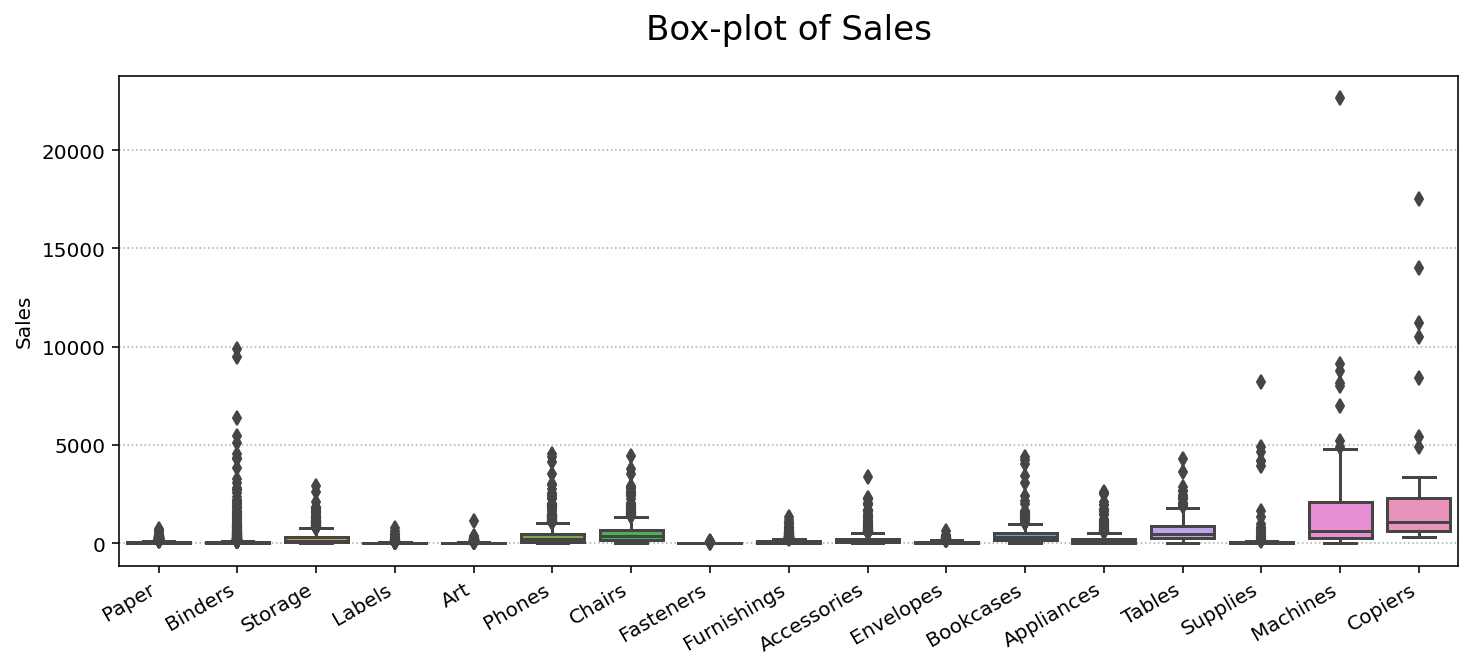

In [48]:
fig, ax = plt.subplots(figsize=(12,5))

ax.set_axisbelow(True)
ax.grid(linestyle=':', axis='y')

sns.boxplot(x='Sub-Category', y='Sales', data=df)
plt.title('Box-plot of Sales', fontsize=17, y=1.05)
plt.xlabel('')
fig.autofmt_xdate()

This box-plot graph tells us the range of prices for the most orders.

For example:

Copiers have a high variance of outliers, and from the **previous graph (Revenue by each Sub-Category)**, the copiers generate revenue up to 1 USD.

But in **this plot (Box-plot of Sales)**, found that the box plot is lower than 5000 USD. That is, most orders have low prices while the copiers generate revenue up to 1 USD because the sales come from the outliers that have a few orders but generate high revenue.

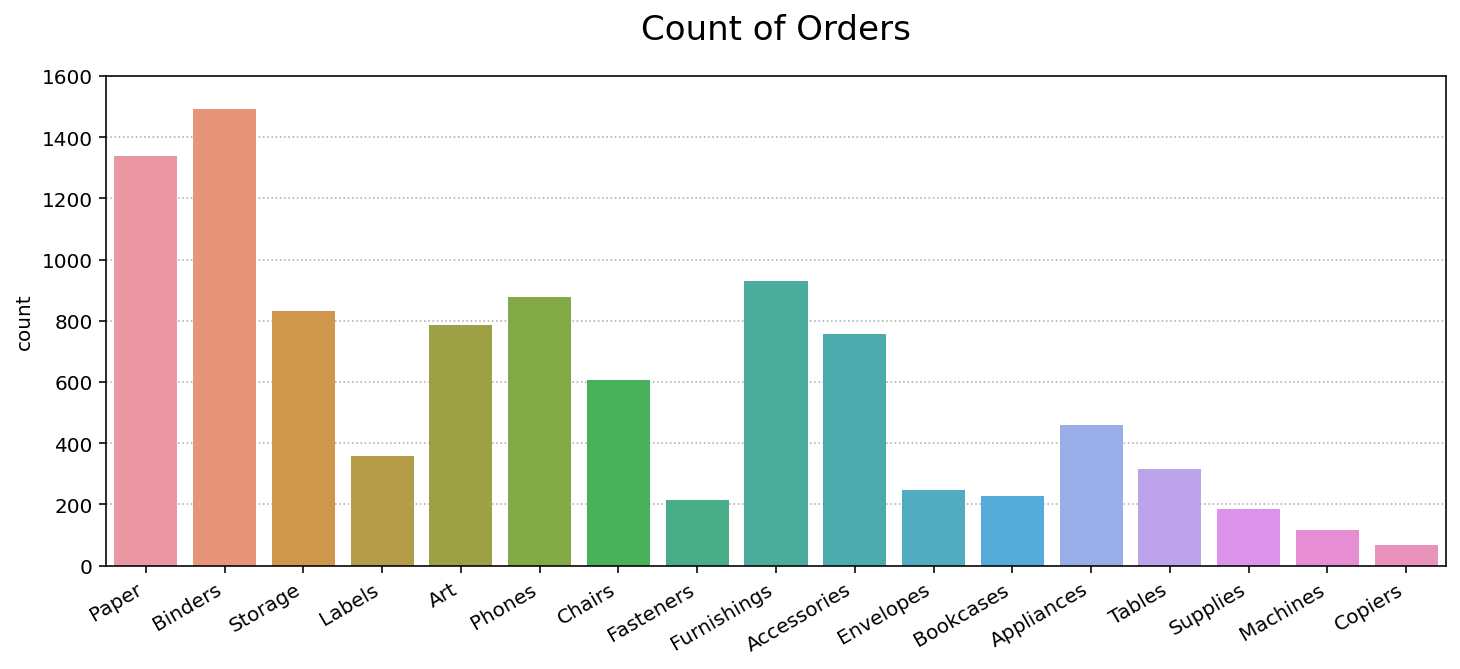

In [49]:
fig, ax = plt.subplots(figsize=(12,5))

ax.set_axisbelow(True)
ax.grid(linestyle=':', axis='y')

sns.countplot(x=df['Sub-Category'])
plt.title('Count of Orders', fontsize=17, y=1.05)
plt.xlabel('')
plt.ylim(0,1600)
fig.autofmt_xdate()

In [50]:
df['Sub-Category'][df['Sub-Category']=='Copiers'].count()

66

The "Copiers" only have 66 orders.

### Correlation of Features

Text(0.5, 1.05, 'Sales vs Categories')

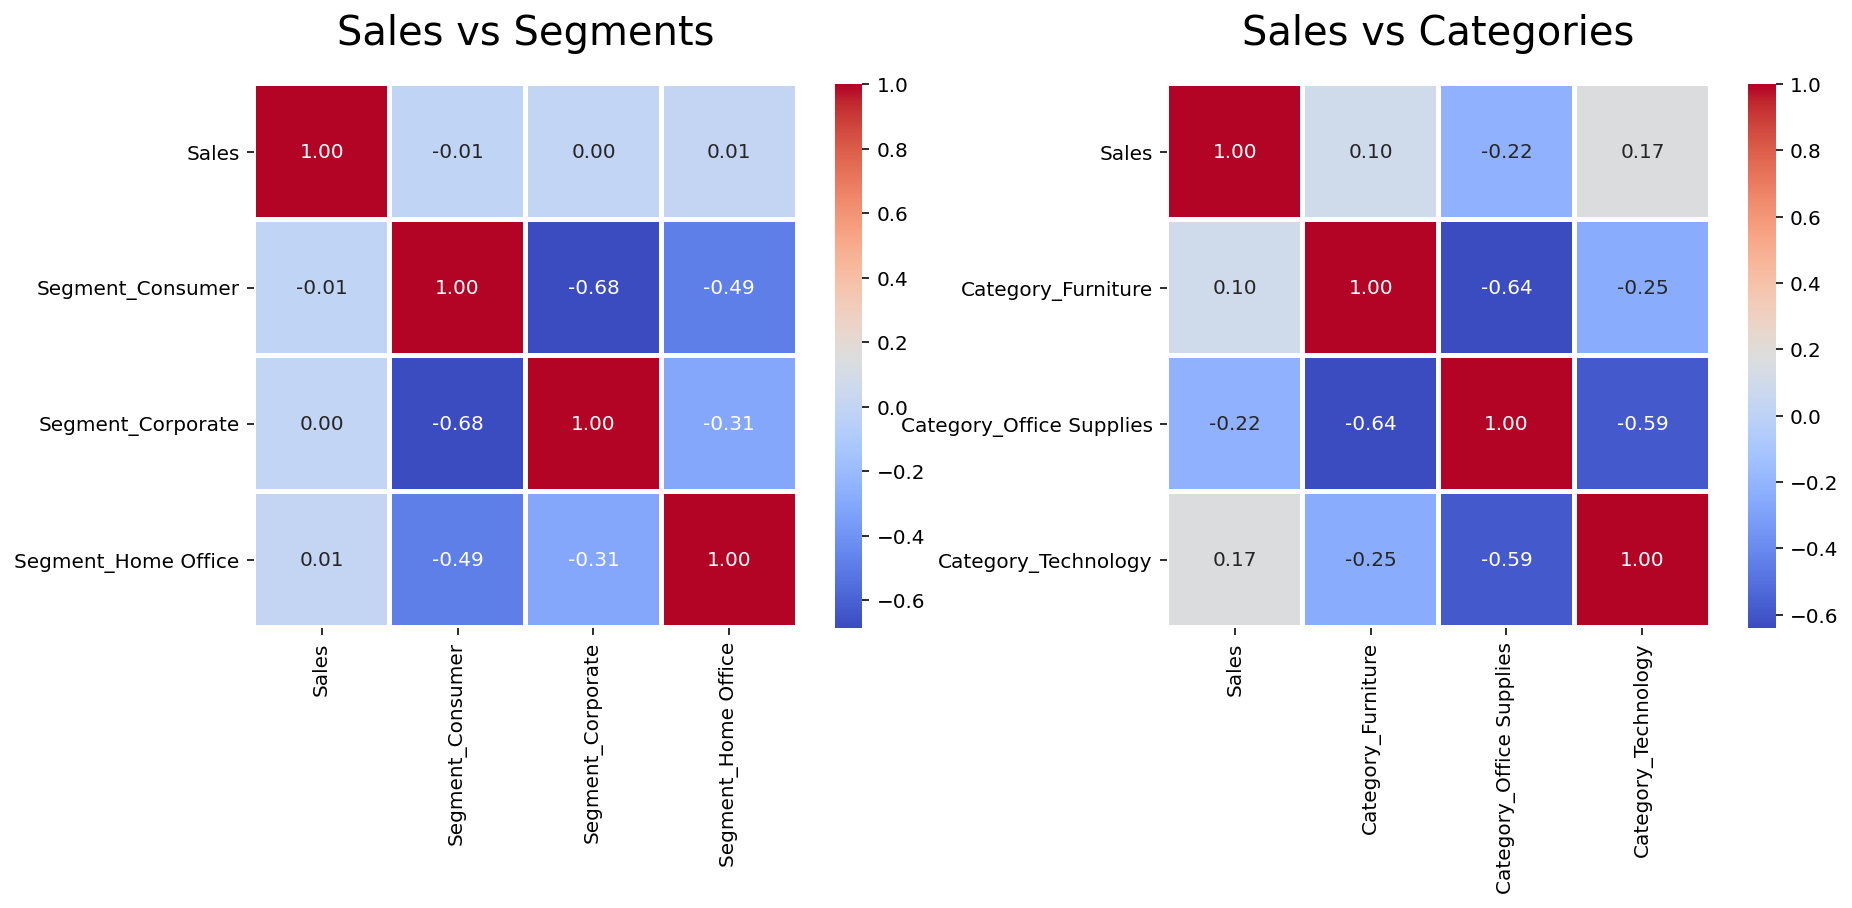

In [51]:
fig, ax = plt.subplots(1, 2, figsize=(15,5))

# 1
corr_seg = df[['Segment','Sales']]
corr_seg = pd.get_dummies(corr_seg)

sns.heatmap(corr_seg.corr(), annot = True, fmt='.2f',
            square = True, cmap='coolwarm',
            linecolor='white', linewidths=2, ax=ax[0])
ax[0].set_title('Sales vs Segments', fontsize=20, y=1.05)

# 2
corr_cat = df[['Category','Sales']]
corr_cat = pd.get_dummies(corr_cat)

sns.heatmap(corr_cat.corr(), annot = True, fmt='.2f',
            square = True, cmap='coolwarm',
            linecolor='white', linewidths=2, ax=ax[1])
ax[1].set_title('Sales vs Categories', fontsize=20, y=1.05)

Text(0.5, 1.05, 'Correlation between Segments')

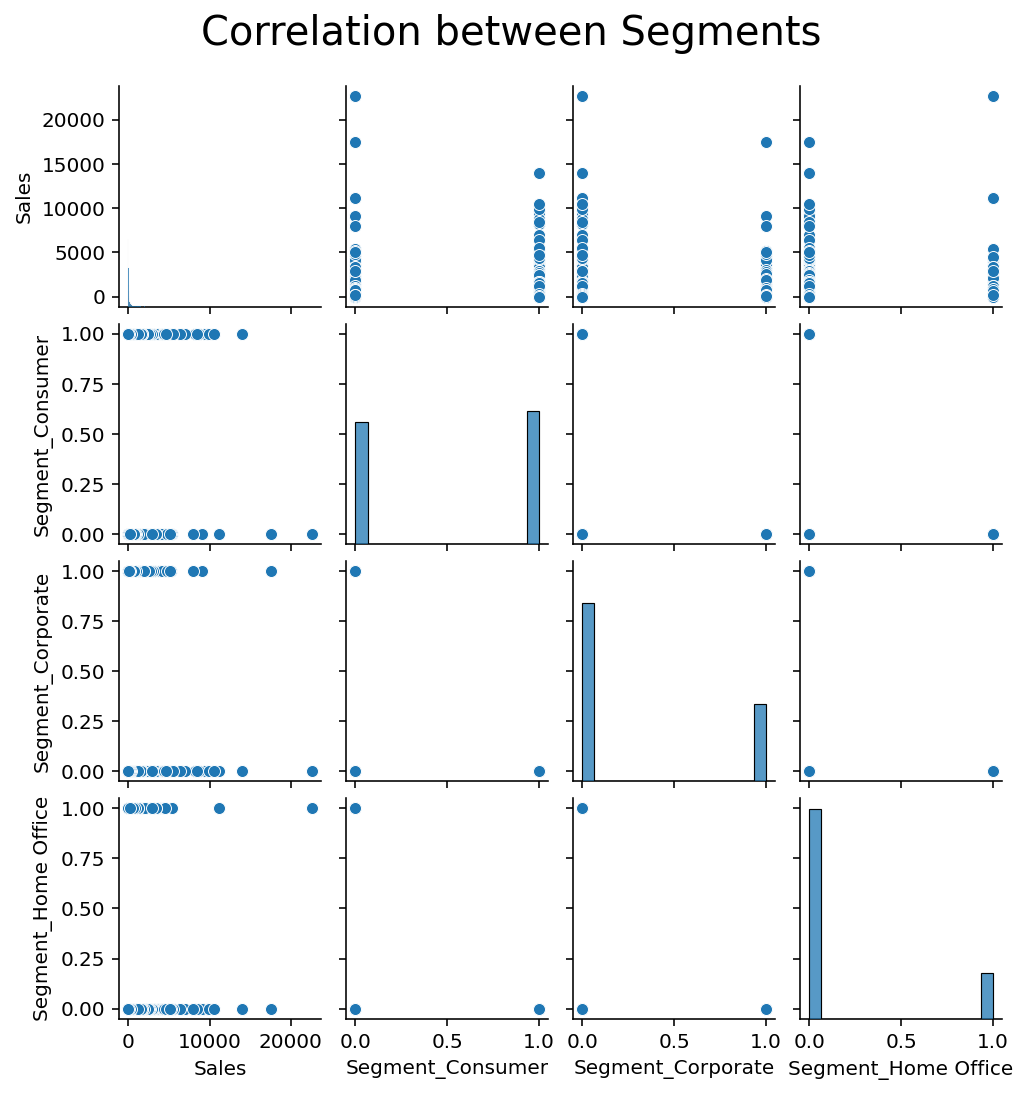

In [52]:
sns.pairplot(corr_seg, height=1.8)
plt.suptitle('Correlation between Segments', fontsize=20, y=1.05)

Text(0.5, 1.05, 'Correlation between Categories')

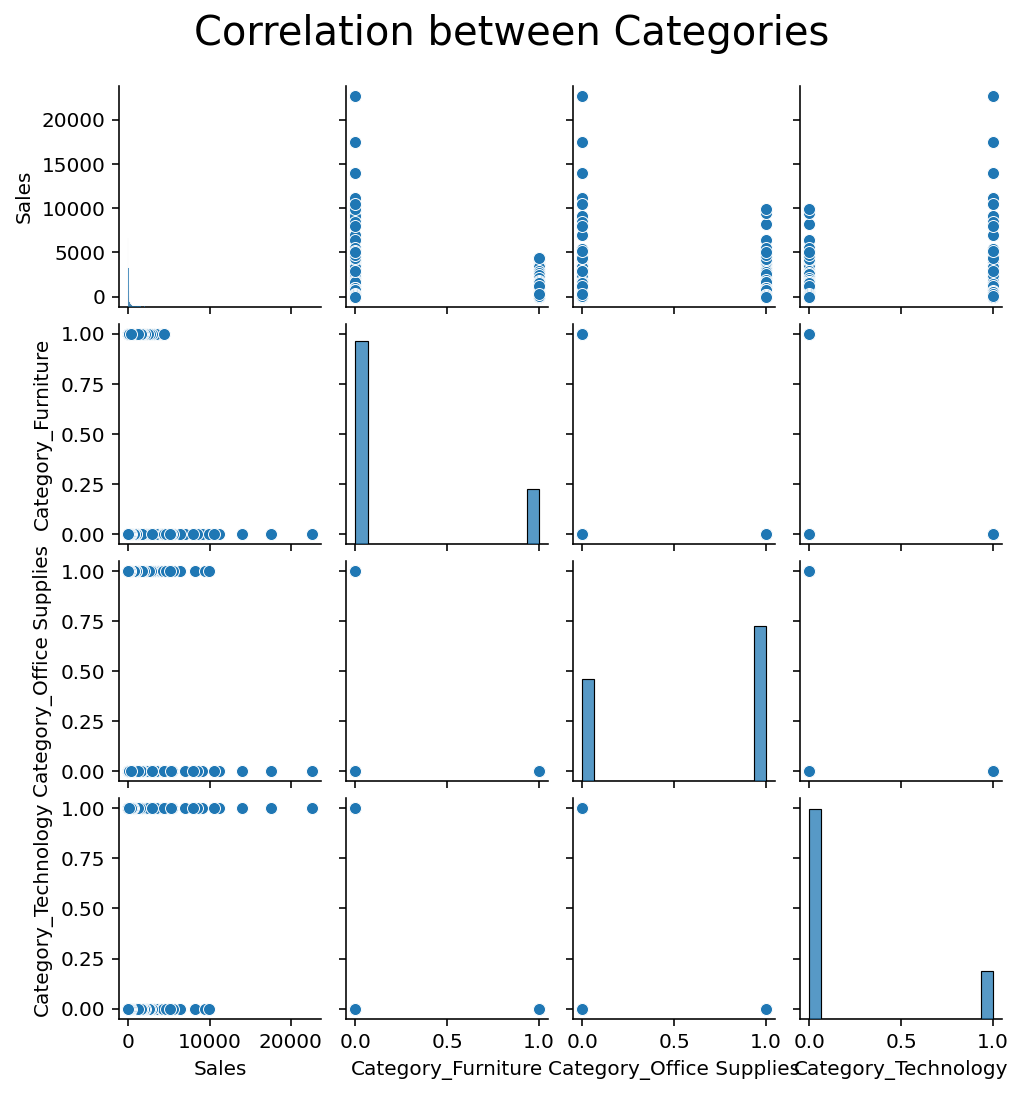

In [53]:
sns.pairplot(corr_cat, height=1.8)
plt.suptitle('Correlation between Categories', fontsize=20, y=1.05)

From the correlation plots, no relationships were found between any feature.

### Time Series of the Total Sales Distribution

In [54]:
new_data = pd.DataFrame(df['Sales'])

Text(0.5, 1.05, 'Total Sales Distribution from 2015-2018')

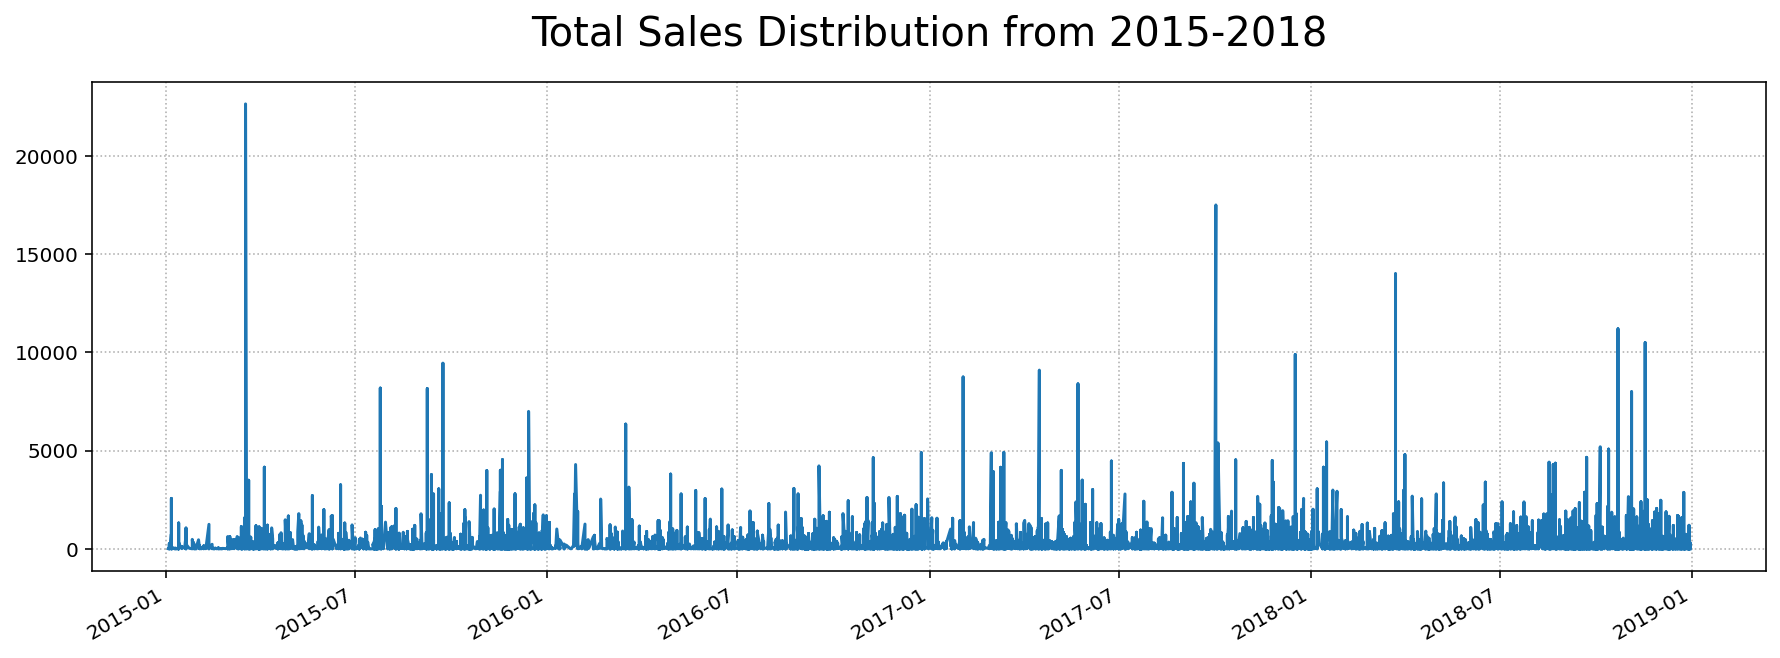

In [55]:
fig, ax = plt.subplots(figsize=(15,5))

ax.set_axisbelow(True)
ax.grid(linestyle=':', axis='both')

ax.plot(new_data)
fig.autofmt_xdate()
ax.set_title('Total Sales Distribution from 2015-2018', fontsize=20, y=1.05)

#### Show the Sale split into months and years.

Text(0.5, 0.95, 'Sales Distribution by Months')

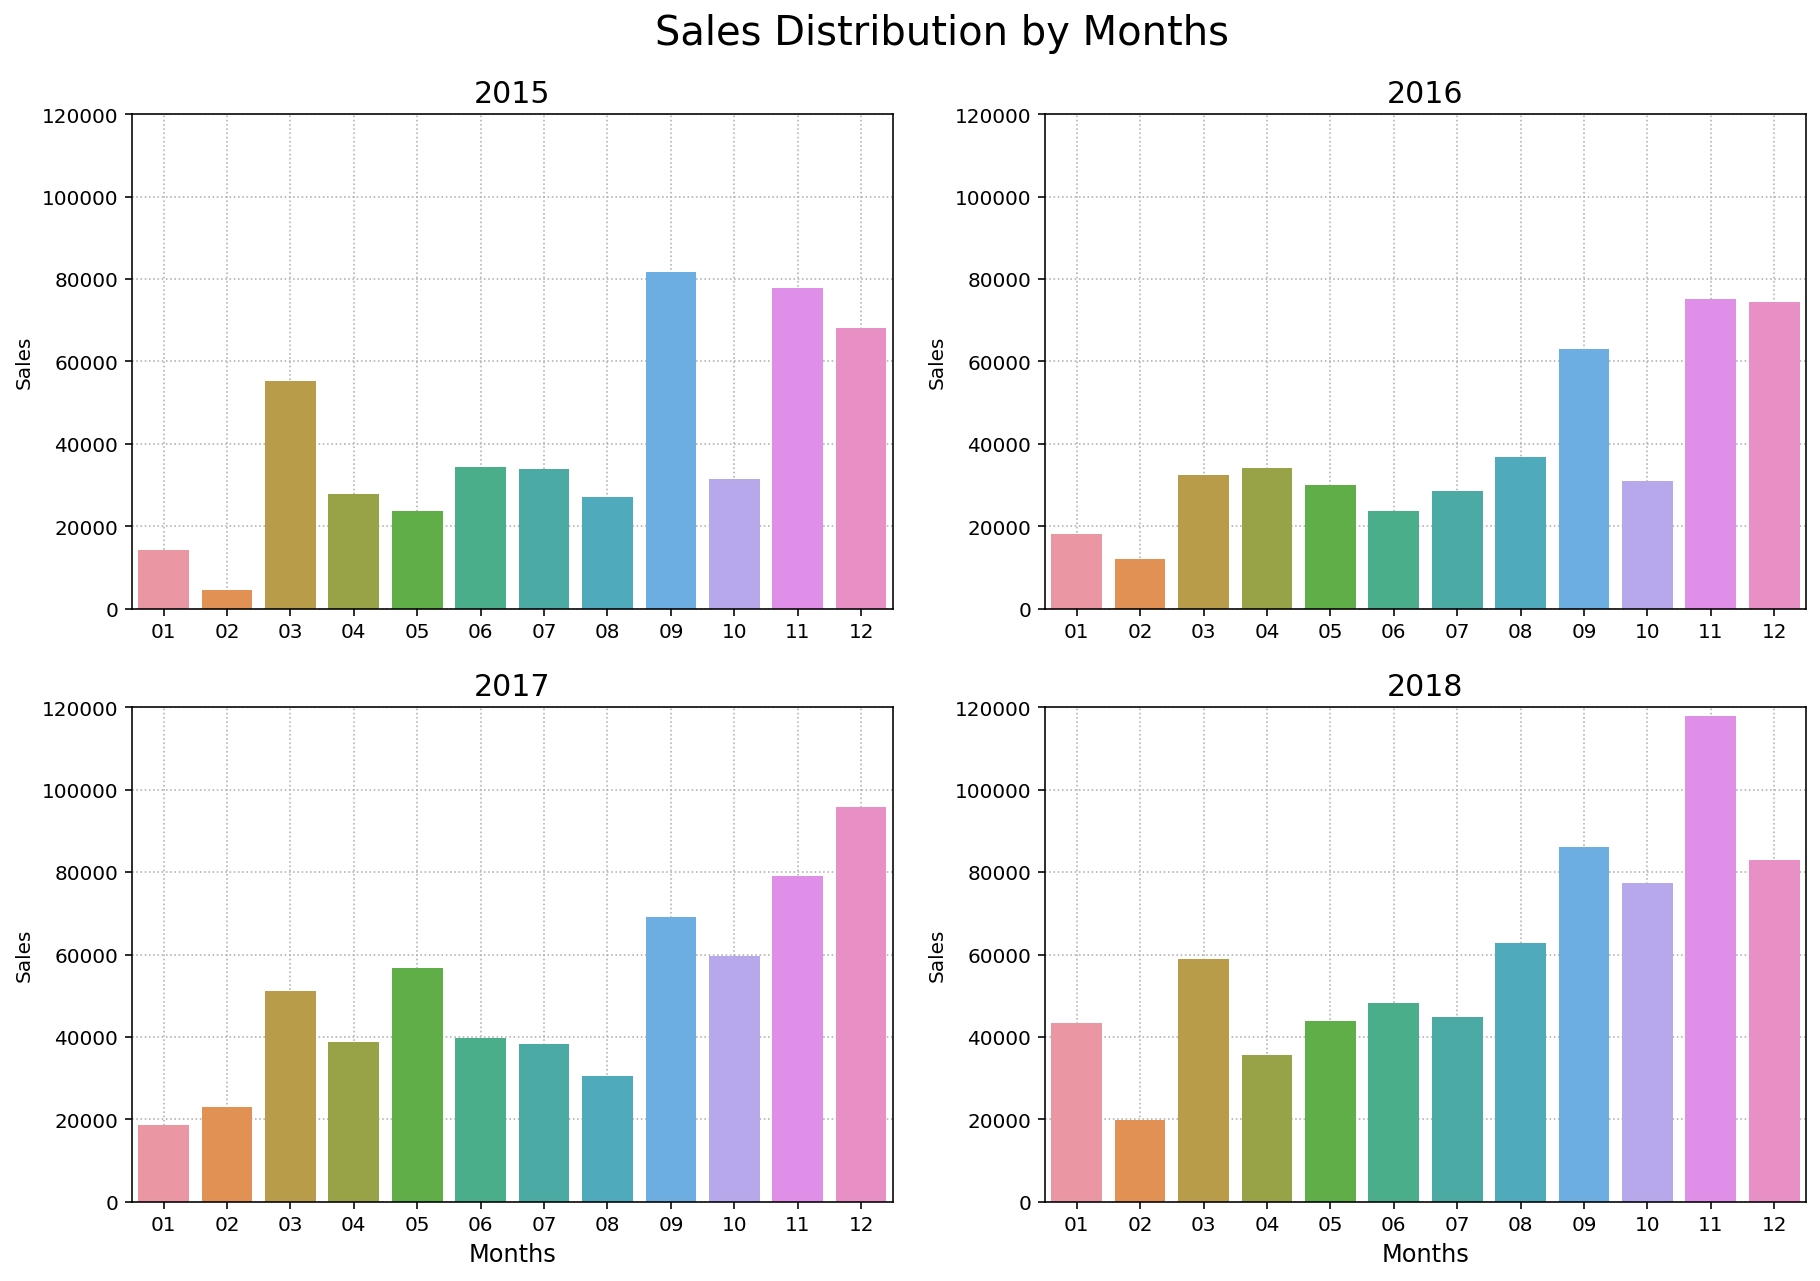

In [56]:
size_i = 2
size_j = 2
y_lim = (0,12E4)

fig, ax = plt.subplots(size_i, size_j, figsize=(15,10))

cnt=0
for i in range(0,size_i):
    for j in range(0,size_j):
        df_month = df[df['Year-Order']==str(cnt+i+j+2015)].groupby('Month-Order').sum()
        sns.barplot(x=df_month.index,y='Sales',data=df_month, ax=ax[i,j])
        ax[i,j].set_title(str(cnt+i+j+2015), fontsize=15)
        ax[i,j].set(ylim=y_lim, xlabel='')
        ax[i,j].set_axisbelow(True)
        ax[i,j].grid(linestyle=':', axis='both')
        
        if i==size_i-1:
            ax[size_j-1,j].set_xlabel('Months', fontsize=12)
    cnt+=1
    
fig.suptitle('Sales Distribution by Months', fontsize=20, y=0.95)

#### Show the Sale and Orders placed split into day of the week.

In [57]:
Sales_days = df.groupby(['Day-of-Week']).sum()
Orders_days = df.groupby(['Day-of-Week']).count()

custom_dict = {'Mon':0,'Tue':1,'Wed':2,'Thu':3,'Fri':4,'Sat':5,'Sun':6} 
Sales_days.sort_index(key=lambda x: x.map(custom_dict), inplace=True)
Orders_days.sort_index(key=lambda x: x.map(custom_dict), inplace=True)

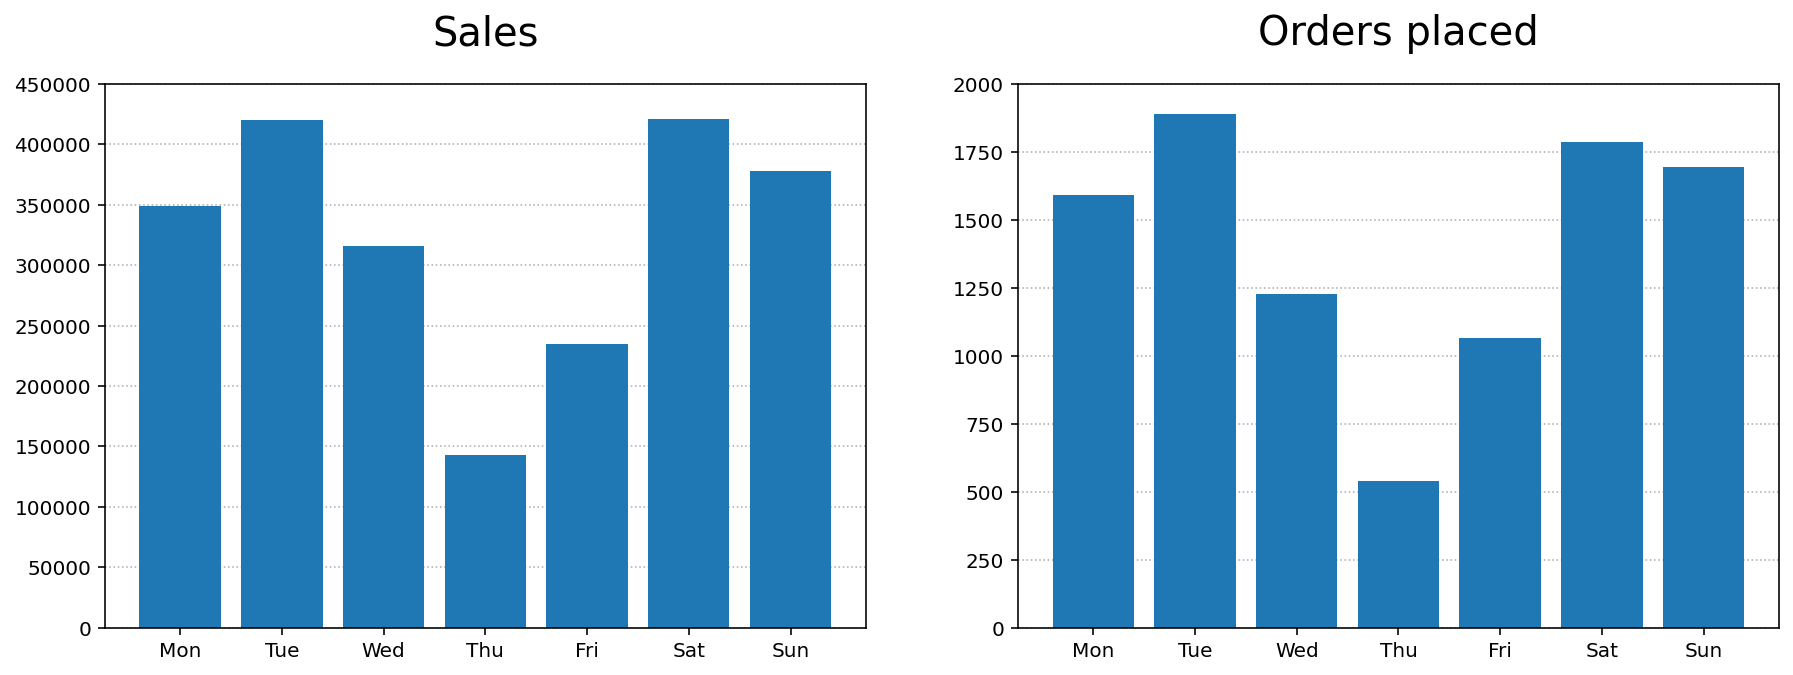

In [58]:
fig, ax = plt.subplots(1, 2, figsize=(15,5))

ax[0].bar(Sales_days.index, Sales_days['Sales'])
ax[0].set(ylim=(0,45E4))
ax[0].set_title('Sales', fontsize=20, y=1.05)
ax[0].set_axisbelow(True)
ax[0].grid(linestyle=':', axis='y')

ax[1].bar(Orders_days.index, Orders_days['Sales'])
ax[1].set(ylim=(0,2000))
ax[1].set_title('Orders placed', fontsize=20, y=1.05)

#plt.ylim(0,2000)
#plt.title('Orders placed', fontsize=20, y=1.05)
ax[1].set_axisbelow(True)
ax[1].grid(linestyle=':', axis='y')

### Calculate the Shipping Time

In [59]:
df['Diff-days'] = df['Ship Date'] - df.index

In [60]:
df['Diff-days'] = df['Diff-days'].astype('timedelta64[D]')

In [61]:
diff_days = df.groupby(['State']).mean()
diff_days.reset_index(level=0, inplace=True)
diff_days.drop(['Postal Code','Sales'], axis = 1, inplace = True)

diff_days= diff_days.sort_values('State', ascending=True)
diff_days.reset_index(inplace = True)

diff_days.drop('index',axis = 1,inplace = True)
diff_days.insert(0, 'State Code', state_df['State Code'])

In [62]:
fig = go.Figure(data = go.Choropleth(
    locations = diff_days['State Code'], # Spatial coordinates
    text = diff_days['Diff-days'],
    z = diff_days['Diff-days'].astype(float), # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = 'Blues',
    colorbar_title = "Diff-days",
))

fig.update_layout(
    title_text = 'Interactive Shipping Time (Avg.) Map',
    geo_scope='usa', # limite map scope to the USA
)

![](./img/img2.png) 

Average shipping time. Darker is slower, and lighter is faster.

---
# Thank You